In [1]:
pip install pandas numpy matplotlib seaborn missingno scipy statsmodels scikit-learn xgboost tensorflow tslearn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip uninstall -y tensorflow tensorflow-intel keras keras-preprocessing tensorflow-estimator
!pip cache purge
!pip install tensorflow==2.7.0


Found existing installation: tensorflow-intel 2.11.0
Uninstalling tensorflow-intel-2.11.0:
  Successfully uninstalled tensorflow-intel-2.11.0
Found existing installation: keras 2.7.0
Uninstalling keras-2.7.0:
  Successfully uninstalled keras-2.7.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: tensorflow-estimator 2.7.0
Uninstalling tensorflow-estimator-2.7.0:
  Successfully uninstalled tensorflow-estimator-2.7.0


Files removed: 1491
   ---------------------------------------- 430.8/430.8 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 1.3/1.3 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 463.1/463.1 kB 5.7 MB/s eta 0:00:00


In [4]:
!pip show tensorflow
!pip show protobuf


Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\linap\appdata\local\programs\python\python37\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, protobuf, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wheel, wrapt
Required-by: 
Name: protobuf
Version: 3.20.3
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: BSD-3-Clause
Location: c:\users\linap\appdata\local\programs\python\python37\lib\site-packages
Requires: 
Required-by: tensorboard, tensorflow


In [3]:
# --- Основни пакети за работа со податоци ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# --- Статистика и аномалии ---
from scipy import stats
from scipy.stats import boxcox
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Временски серии ---
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR

# --- Предобработка и скалирање ---
from sklearn.preprocessing import StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# --- PCA / димензионална редукција ---
from sklearn.decomposition import PCA

# --- Машинско учење и модели ---
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Neural networks / Deep learning ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, GRU

# --- Clustering / Time Series Clustering ---
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import SpectralClustering
from scipy.fft import fft

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Data Overview

In [39]:
from ucimlrepo import fetch_ucirepo 
  
air_quality = fetch_ucirepo(id=360) 
  
X = air_quality.data.features 
y = air_quality.data.targets 
  
print(air_quality.metadata) 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

In [40]:
df = pd.concat([X, y], axis=1)

print(type(df)) 

<class 'pandas.core.frame.DataFrame'>


In [42]:
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6         1360       150      11.9   
1     3/10/2004  19:00:00     2.0         1292       112       9.4   
2     3/10/2004  20:00:00     2.2         1402        88       9.0   
3     3/10/2004  21:00:00     2.2         1376        80       9.2   
4     3/10/2004  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  
0            1268  13.6  48.9  0.7578  
1             972  13.3  47.7  0.7255  
2            1074  11.9  54.0  0.7502  
3            1203  11.0  60.0  0.7867  
4            1110  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352         1729  21.9  29.3  0.7568  
9353         1269  24.3  23.7  0.7119  
9354         1092  26.9  18.3  0.6406  
9355          770  28.3  13.5  0.5139  
9356          816  28.5  13.1  0.5028  

[9357 rows x 15 columns]

In [43]:
df.shape

(9357, 15)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [45]:
print(df.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object


### Data Preprocessing

##### Needed transformation

In [46]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

In [47]:
df

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6         1360       150      11.9           1046   
2004-03-10 19:00:00     2.0         1292       112       9.4            955   
2004-03-10 20:00:00     2.2         1402        88       9.0            939   
2004-03-10 21:00:00     2.2         1376        80       9.2            948   
2004-03-10 22:00:00     1.6         1272        51       6.5            836   
...                     ...          ...       ...       ...            ...   
2005-04-04 10:00:00     3.1         1314      -200      13.5           1101   
2005-04-04 11:00:00     2.4         1163      -200      11.4           1027   
2005-04-04 12:00:00     2.4         1142      -200      12.4           1063   
2005-04-04 13:00:00     2.1         1003      -200       9.5            961   
2005-04-04 14:00:00     2.2         1071      -200      11.9           1047   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00      166          1056      113          1692   
2004-03-10 19:00:00      103          1174       92          1559   
2004-03-10 20:00:00      131          1140      114          1555   
2004-03-10 21:00:00      172          1092      122          1584   
2004-03-10 22:00:00      131          1205      116          1490   
...                      ...           ...      ...           ...   
2005-04-04 10:00:00      472           539      190          1374   
2005-04-04 11:00:00      353           604      179          1264   
2005-04-04 12:00:00      293           603      175          1241   
2005-04-04 13:00:00      235           702      156          1041   
2005-04-04 14:00:00      265           654      168          1129   

                     PT08.S5(O3)     T    RH      AH  
Datetime                                              
2004-03-10 18:00:00         1268  13.6  48.9  0.7578  
2004-03-10 19:00:00          972  13.3  47.7  0.7255  
2004-03-10 20:00:00         1074  11.9  54.0  0.7502  
2004-03-10 21:00:00         1203  11.0  60.0  0.7867  
2004-03-10 22:00:00         1110  11.2  59.6  0.7888  
...                          ...   ...   ...     ...  
2005-04-04 10:00:00         1729  21.9  29.3  0.7568  
2005-04-04 11:00:00         1269  24.3  23.7  0.7119  
2005-04-04 12:00:00         1092  26.9  18.3  0.6406  
2005-04-04 13:00:00          770  28.3  13.5  0.5139  
2005-04-04 14:00:00          816  28.5  13.1  0.5028  

[9357 rows x 13 columns]

##### Missing values

In [48]:
missing_per_colum = df.isna().sum()
print(missing_per_colum)

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


Although the dataset does not contain standard null values, according to its description, missing measurements are represented by the value -200 or -200.0.

In [49]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].replace([-200, -200.0], np.nan)
df[numeric_cols] = df[numeric_cols].astype(float)


In [50]:
missing_per_column = df.isna().sum()
print(missing_per_column)

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [51]:
total_missing = df.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 16701


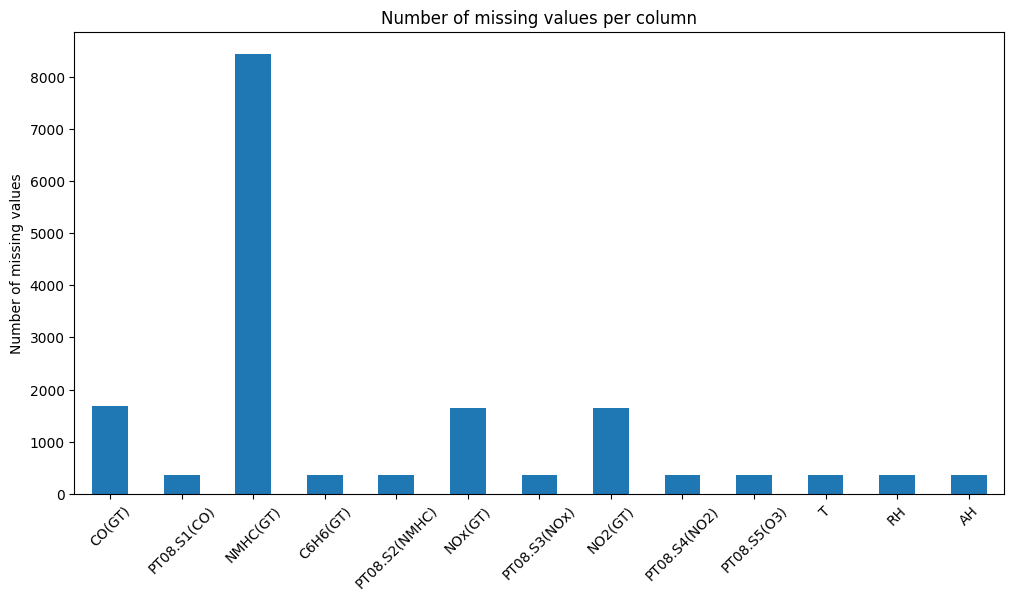

In [52]:
missing_per_column = df.isna().sum()
plt.figure(figsize=(12, 6))
missing_per_column.plot(kind='bar')
plt.title("Number of missing values per column")
plt.ylabel("Number of missing values")
plt.xticks(rotation=45)
plt.show()

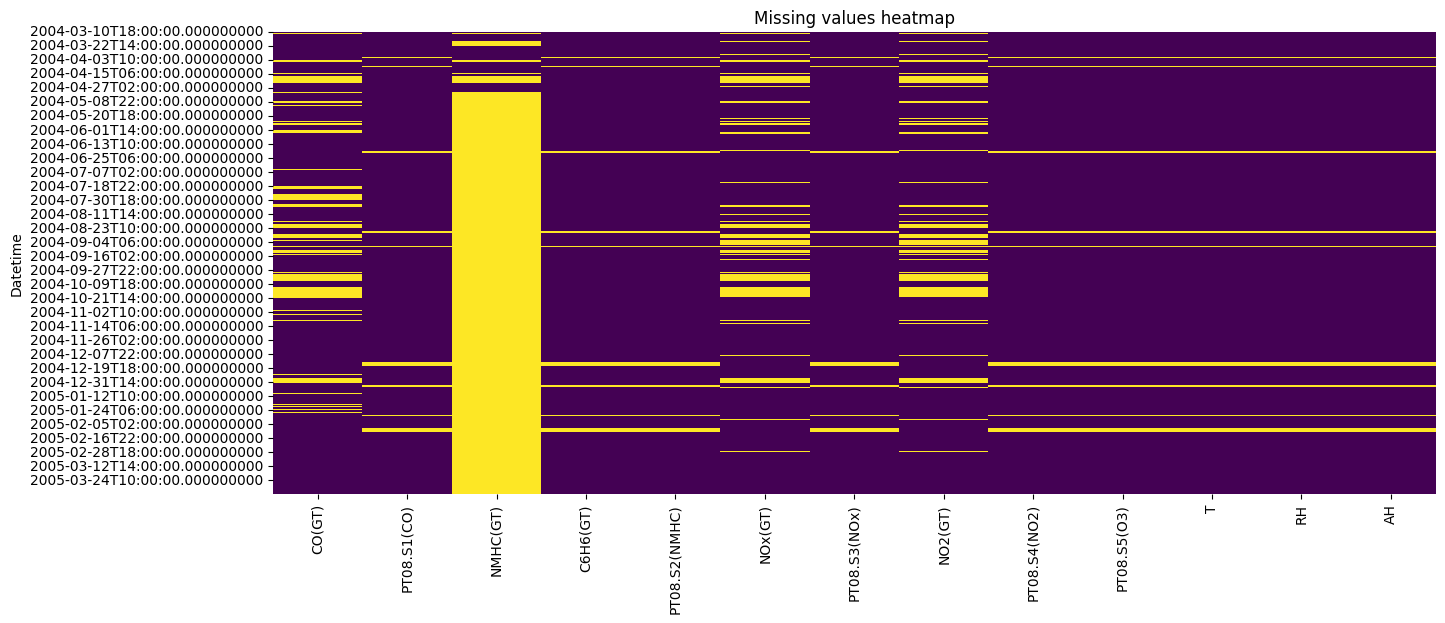

In [53]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing values heatmap")
plt.show()

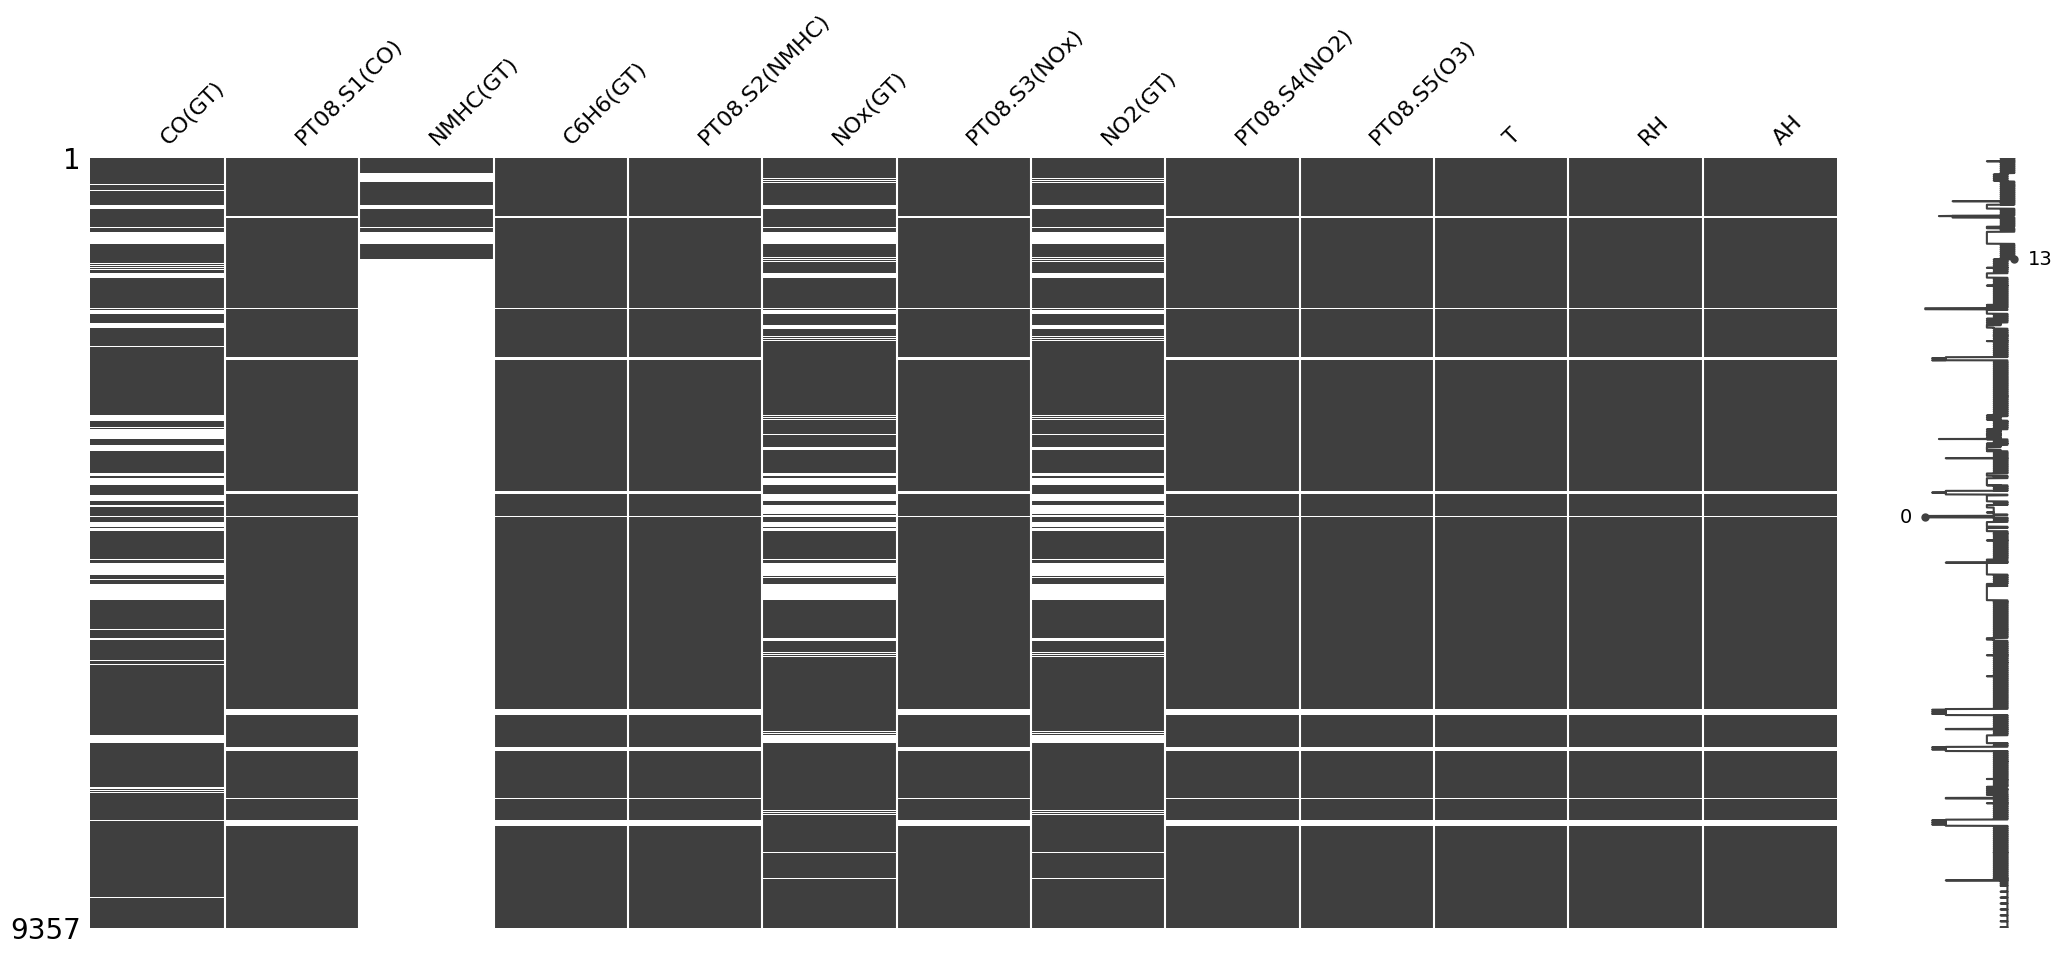

In [54]:
msno.matrix(df)
plt.show()

In [55]:
threshold = 0.8
cols_to_drop = df.columns[(df.isna().sum() / len(df)) > threshold]
df.drop(columns=cols_to_drop, inplace=True)
print("Removed columns:", cols_to_drop.to_list())

Removed columns: ['NMHC(GT)']


In [56]:
df.interpolate(method='time', inplace=True)

In [57]:
total_missing = df.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


##### Outliers

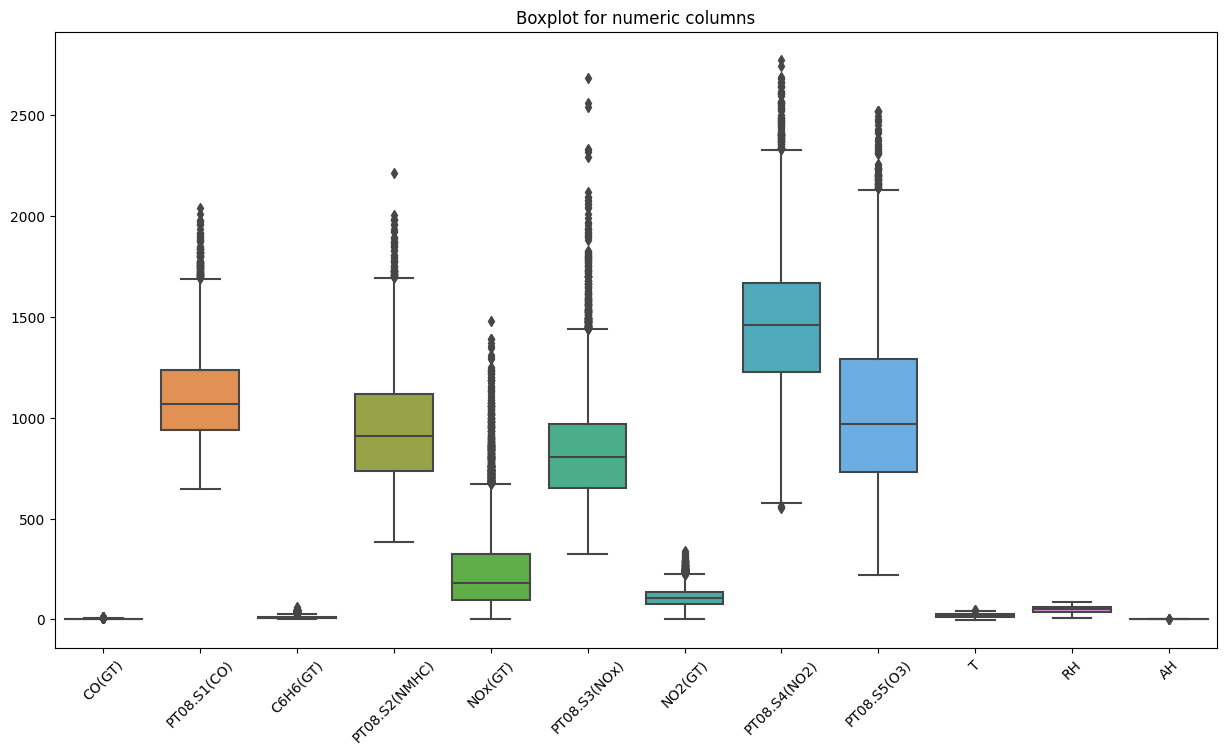

In [58]:
numeric_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 8))
sns.boxplot(data = df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for numeric columns")
plt.show()

In [59]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

CO(GT): 224 outliers
PT08.S1(CO): 103 outliers
C6H6(GT): 242 outliers
PT08.S2(NMHC): 64 outliers
NOx(GT): 432 outliers
PT08.S3(NOx): 239 outliers
NO2(GT): 165 outliers
PT08.S4(NO2): 108 outliers
PT08.S5(O3): 71 outliers
T: 3 outliers
RH: 0 outliers
AH: 4 outliers


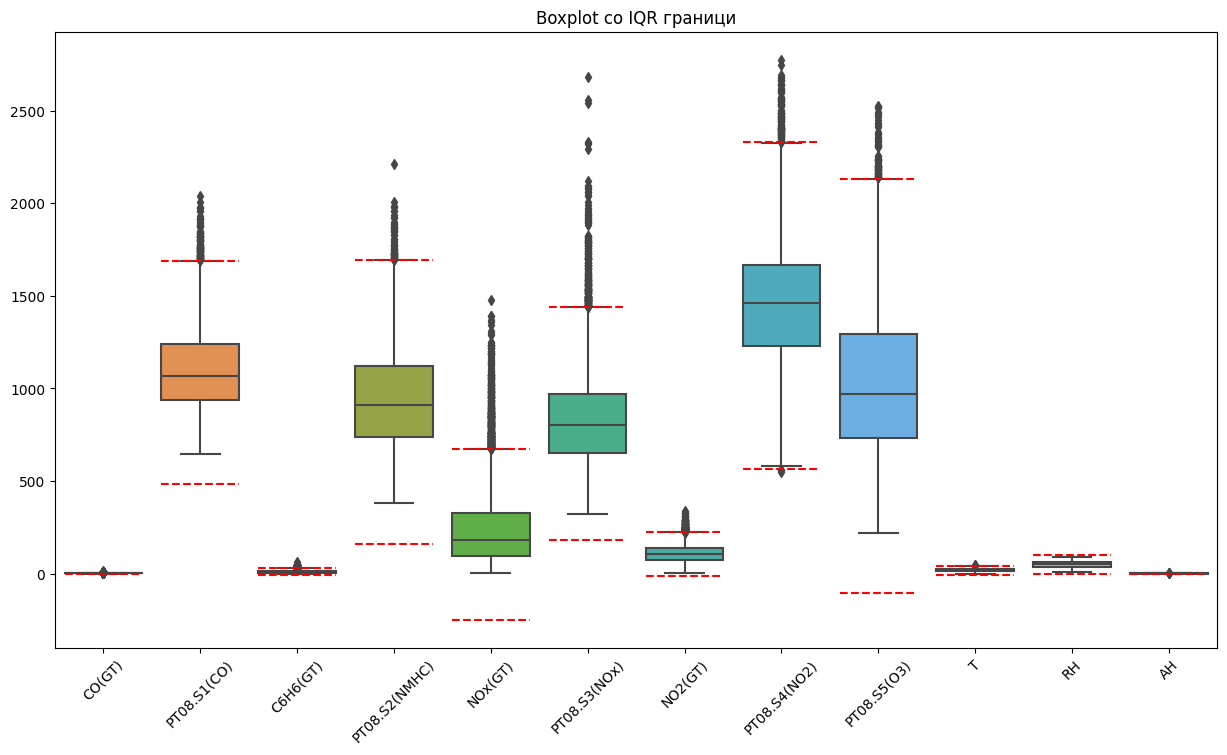

In [60]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot со IQR граници")

for i, col in enumerate(numeric_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    plt.hlines([lower, upper], i - 0.4, i + 0.4, colors='red', linestyles='dashed')
    
plt.show()

In [61]:
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3)
print(f"Num of outliers\n: {np.sum(outliers, axis=None)}")

Num of outliers
: CO(GT)           117
PT08.S1(CO)       56
C6H6(GT)         119
PT08.S2(NMHC)     37
NOx(GT)          167
PT08.S3(NOx)     111
NO2(GT)           66
PT08.S4(NO2)      43
PT08.S5(O3)       29
T                  1
RH                 0
AH                 1
dtype: int64


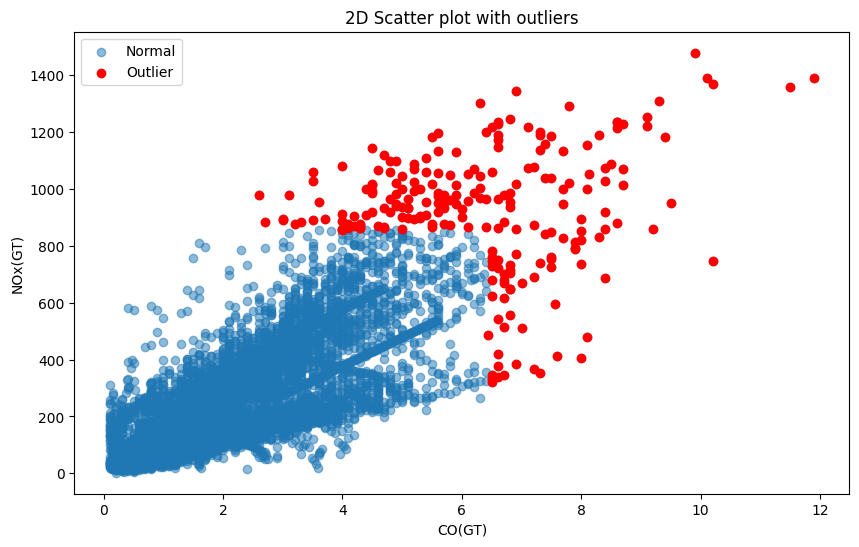

In [62]:
x_col = 'CO(GT)'
y_col = 'NOx(GT)'

z_scores = np.abs(stats.zscore(df[[x_col, y_col]].dropna()))
outliers_mask = (z_scores > 3).any(axis=1)

plt.figure(figsize=(10,6))
plt.scatter(df[x_col], df[y_col], label='Normal', alpha=0.5)
plt.scatter(df[x_col][outliers_mask], df[y_col][outliers_mask], color='red', label='Outlier')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('2D Scatter plot with outliers')
plt.legend()
plt.show()

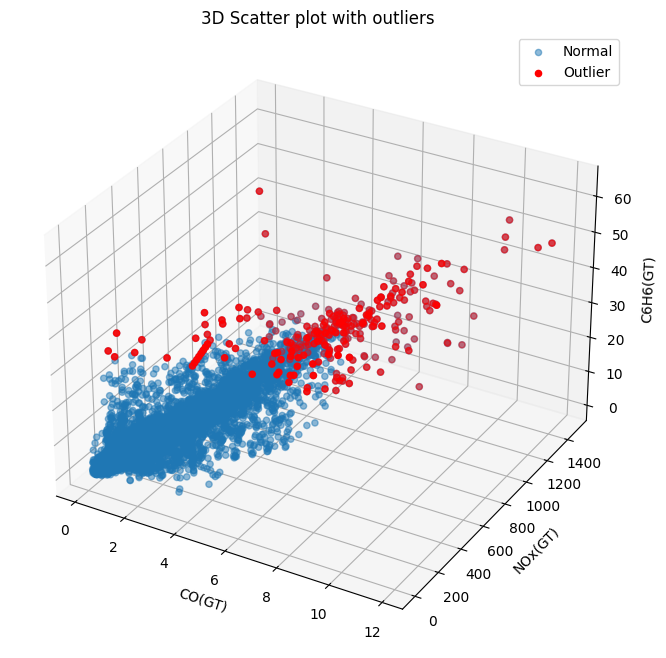

In [63]:
x_col = 'CO(GT)'
y_col = 'NOx(GT)'
z_col = 'C6H6(GT)'

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

z_scores = np.abs(stats.zscore(df[[x_col, y_col, z_col]].dropna()))
outliers_mask = (z_scores > 3).any(axis=1)

ax.scatter(df[x_col], df[y_col], df[z_col], alpha=0.5, label='Normal')
ax.scatter(df[x_col][outliers_mask], df[y_col][outliers_mask], df[z_col][outliers_mask],
           color='red', label='Outlier')

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('3D Scatter plot with outliers')
ax.legend()
plt.show()

In [64]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05) 
subset = df[numeric_cols].dropna()
y_pred = lof.fit_predict(subset)
subset['outlier'] = y_pred 

In [65]:
num_outliers = (subset['outlier'] == -1).sum()
print(f"Број на LOF outliers: {num_outliers}")

subset[subset['outlier']==-1].head(10)

Број на LOF outliers: 468


CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
Datetime                                                                     
2004-03-10 20:00:00     2.2       1402.0       9.0          939.0    131.0   
2004-03-10 22:00:00     1.6       1272.0       6.5          836.0    131.0   
2004-03-10 23:00:00     1.2       1197.0       4.7          750.0     89.0   
2004-03-11 00:00:00     1.2       1185.0       3.6          690.0     62.0   
2004-03-11 02:00:00     0.9       1094.0       2.3          609.0     45.0   
2004-03-11 03:00:00     0.6       1010.0       1.7          561.0     33.0   
2004-03-11 05:00:00     0.7       1066.0       1.1          512.0     16.0   
2004-03-11 06:00:00     0.7       1052.0       1.6          553.0     34.0   
2004-03-11 10:00:00     1.7       1233.0       6.3          827.0    112.0   
2004-03-11 11:00:00     1.5       1179.0       5.0          762.0     95.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Datetime                                                                      
2004-03-10 20:00:00        1140.0    114.0        1555.0       1074.0  11.9   
2004-03-10 22:00:00        1205.0    116.0        1490.0       1110.0  11.2   
2004-03-10 23:00:00        1337.0     96.0        1393.0        949.0  11.2   
2004-03-11 00:00:00        1462.0     77.0        1333.0        733.0  11.3   
2004-03-11 02:00:00        1579.0     60.0        1276.0        620.0  10.7   
2004-03-11 03:00:00        1705.0     47.0        1235.0        501.0  10.3   
2004-03-11 05:00:00        1918.0     28.0        1182.0        422.0  11.0   
2004-03-11 06:00:00        1738.0     48.0        1221.0        472.0  10.5   
2004-03-11 10:00:00        1218.0     98.0        1446.0        860.0  10.8   
2004-03-11 11:00:00        1328.0     92.0        1362.0        671.0  10.5   

                       RH      AH  outlier  
Datetime                                    
2004-03-10 20:00:00  54.0  0.7502       -1  
2004-03-10 22:00:00  59.6  0.7888       -1  
2004-03-10 23:00:00  59.2  0.7848       -1  
2004-03-11 00:00:00  56.8  0.7603       -1  
2004-03-11 02:00:00  59.7  0.7648       -1  
2004-03-11 03:00:00  60.2  0.7517       -1  
2004-03-11 05:00:00  56.2  0.7366       -1  
2004-03-11 06:00:00  58.1  0.7353       -1  
2004-03-11 10:00:00  58.4  0.7552       -1  
2004-03-11 11:00:00  57.9  0.7352       -1

##### Unique values

In [66]:
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values.")

CO(GT): 1435 unique values.
PT08.S1(CO): 1335 unique values.
C6H6(GT): 766 unique values.
PT08.S2(NMHC): 1594 unique values.
NOx(GT): 2329 unique values.
PT08.S3(NOx): 1553 unique values.
NO2(GT): 1569 unique values.
PT08.S4(NO2): 1921 unique values.
PT08.S5(O3): 2058 unique values.
T: 797 unique values.
RH: 1092 unique values.
AH: 7043 unique values.


In [67]:
for col in df.columns:
    num_unique = df[col].nunique()
    total = len(df[col])
    percent_unique = (num_unique / total) * 100
    print(f"{col}: {percent_unique:.2f}% unique values")

CO(GT): 15.34% unique values
PT08.S1(CO): 14.27% unique values
C6H6(GT): 8.19% unique values
PT08.S2(NMHC): 17.04% unique values
NOx(GT): 24.89% unique values
PT08.S3(NOx): 16.60% unique values
NO2(GT): 16.77% unique values
PT08.S4(NO2): 20.53% unique values
PT08.S5(O3): 21.99% unique values
T: 8.52% unique values
RH: 11.67% unique values
AH: 75.27% unique values


##### Duplicate values (rows)

In [68]:
df.tail()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
Datetime                                                                     
2005-04-04 10:00:00     3.1       1314.0      13.5         1101.0    472.0   
2005-04-04 11:00:00     2.4       1163.0      11.4         1027.0    353.0   
2005-04-04 12:00:00     2.4       1142.0      12.4         1063.0    293.0   
2005-04-04 13:00:00     2.1       1003.0       9.5          961.0    235.0   
2005-04-04 14:00:00     2.2       1071.0      11.9         1047.0    265.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Datetime                                                                      
2005-04-04 10:00:00         539.0    190.0        1374.0       1729.0  21.9   
2005-04-04 11:00:00         604.0    179.0        1264.0       1269.0  24.3   
2005-04-04 12:00:00         603.0    175.0        1241.0       1092.0  26.9   
2005-04-04 13:00:00         702.0    156.0        1041.0        770.0  28.3   
2005-04-04 14:00:00         654.0    168.0        1129.0        816.0  28.5   

                       RH      AH  
Datetime                           
2005-04-04 10:00:00  29.3  0.7568  
2005-04-04 11:00:00  23.7  0.7119  
2005-04-04 12:00:00  18.3  0.6406  
2005-04-04 13:00:00  13.5  0.5139  
2005-04-04 14:00:00  13.1  0.5028

In [69]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 0


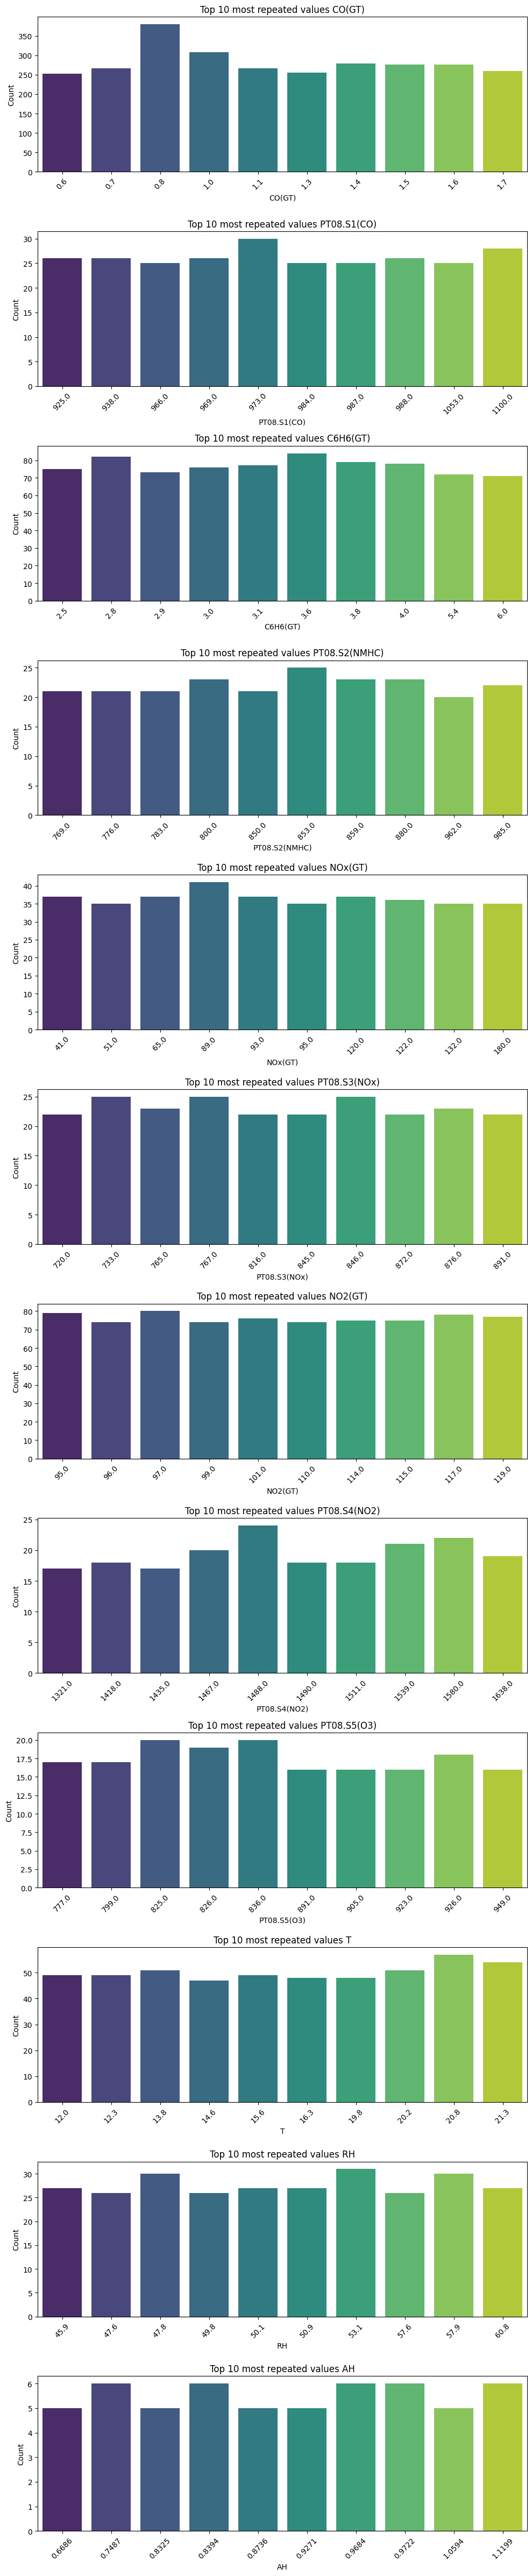

In [70]:
plt.figure(figsize=(10, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    
    top_vals = df[col].value_counts().head(10)
    top_df = top_vals.reset_index()
    top_df.columns = [col, "count"]
    
    sns.barplot(
        data=top_df,
        x=col,
        y="count",
        hue=col,      
        palette="viridis",
        dodge=False
    )
    
    plt.title(f"Top 10 most repeated values {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend().remove()

plt.tight_layout()
plt.show()


### Data Visualization / EDA

##### Time Series Analysis

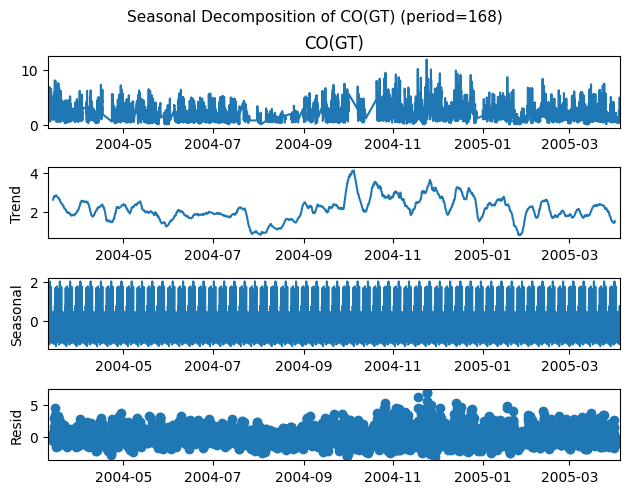

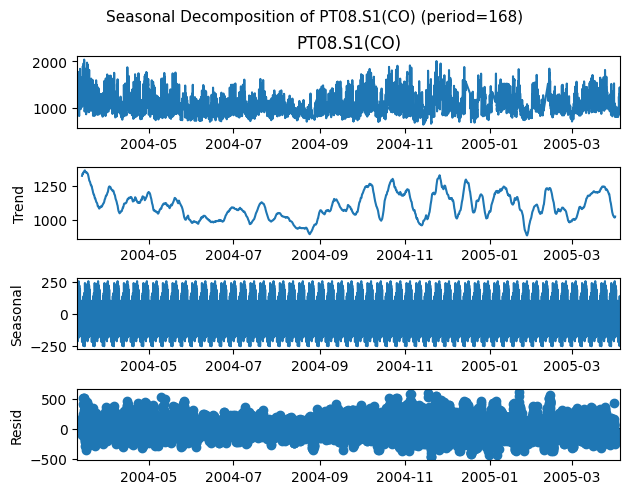

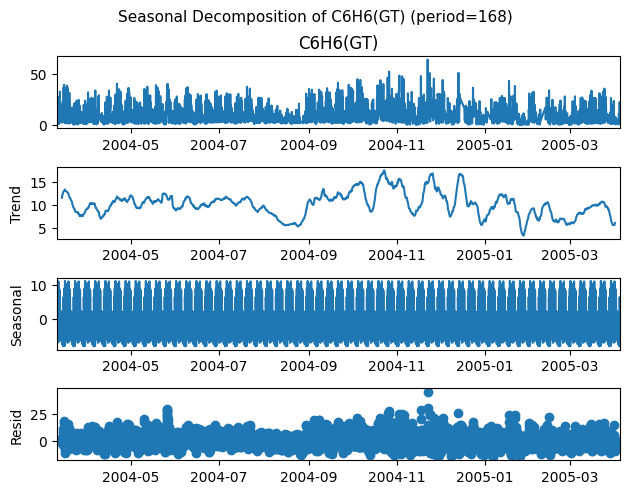

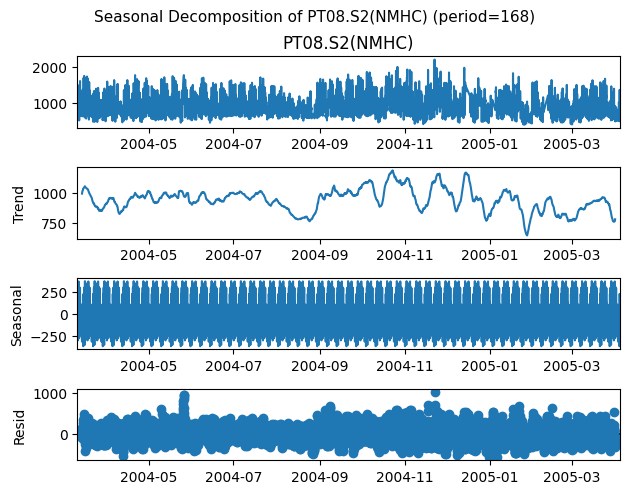

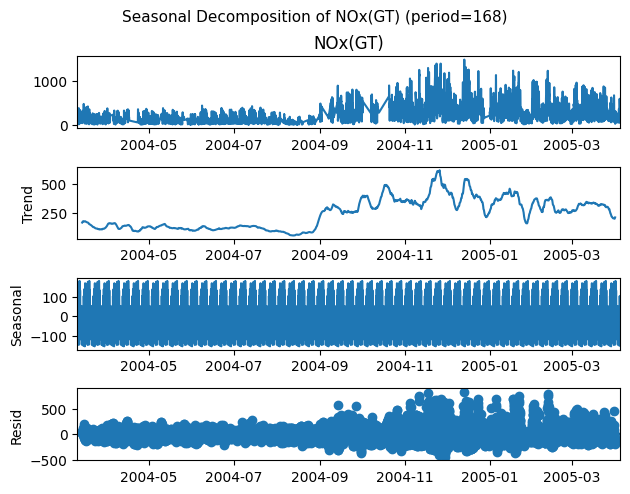

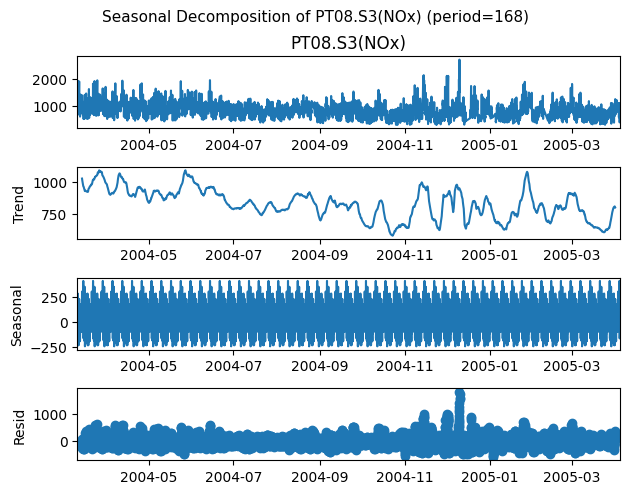

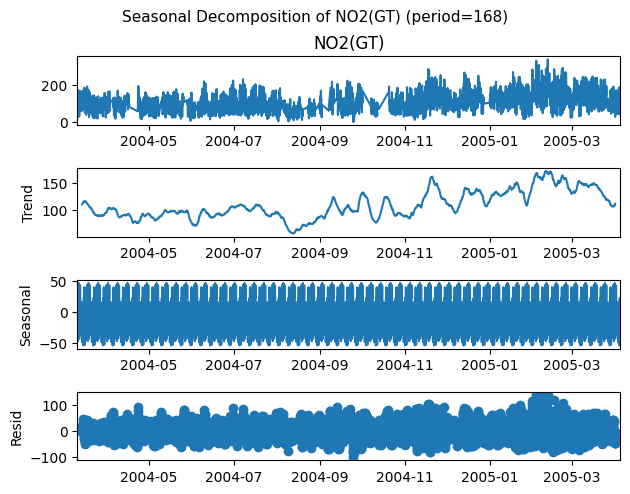

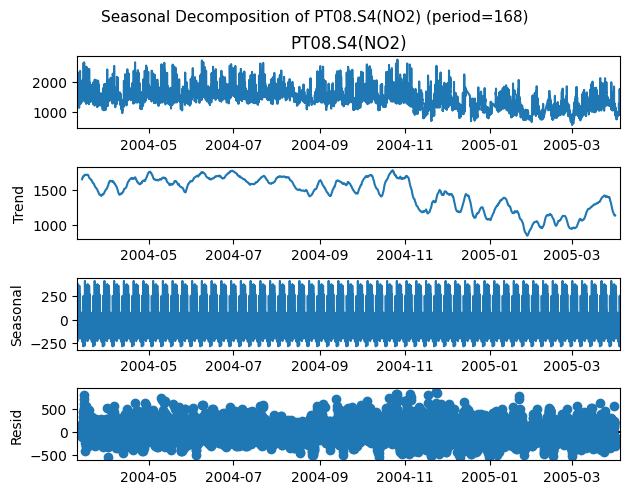

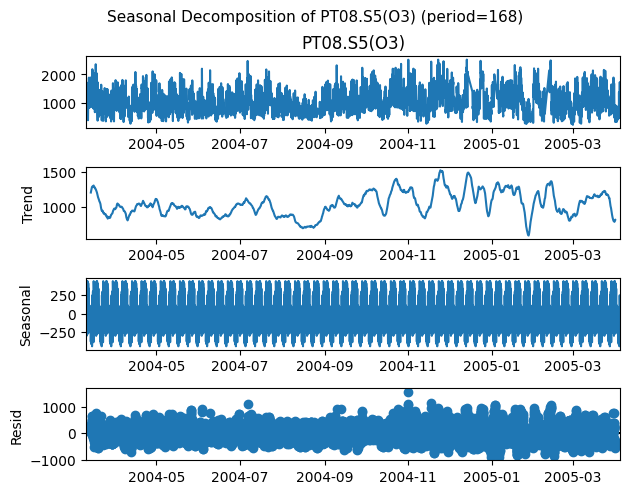

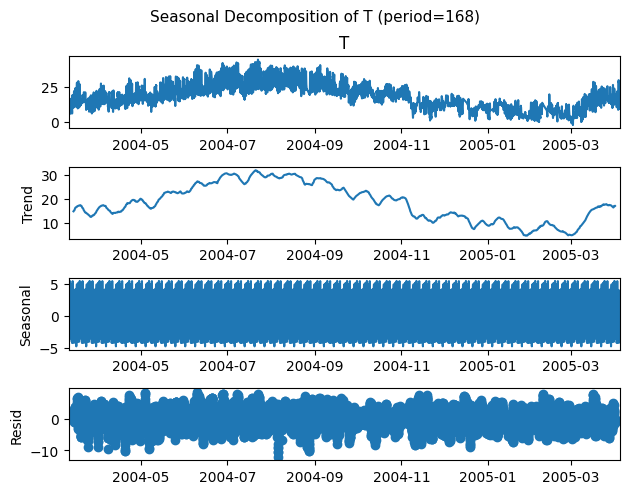

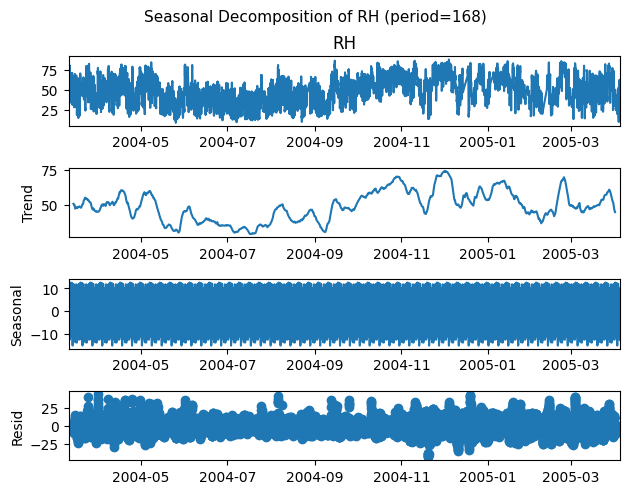

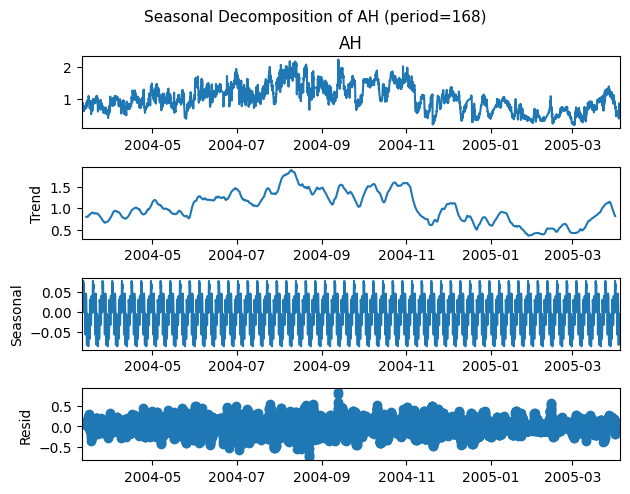

In [38]:
period = 168

for col in df.columns:
    ts = df[col]

    result = seasonal_decompose(ts, model='additive', period=period)
    result.plot()
    plt.suptitle(f"Seasonal Decomposition of {col} (period={period})", fontsize=11, y=1.02)
    plt.show()

#### Simpson's paradox

In [71]:
df_copy = df.copy()
df_copy['month'] = df_copy.index.month
df_copy['season'] = df_copy['month']%12 // 3 + 1  # 1=winter, 2=spring, 3=summer, 4=autumn/fall

In [72]:
daily_co = df_copy['CO(GT)'].resample('D').mean()

seasonal_co = df_copy.groupby(['season']).resample('D')['CO(GT)'].mean()

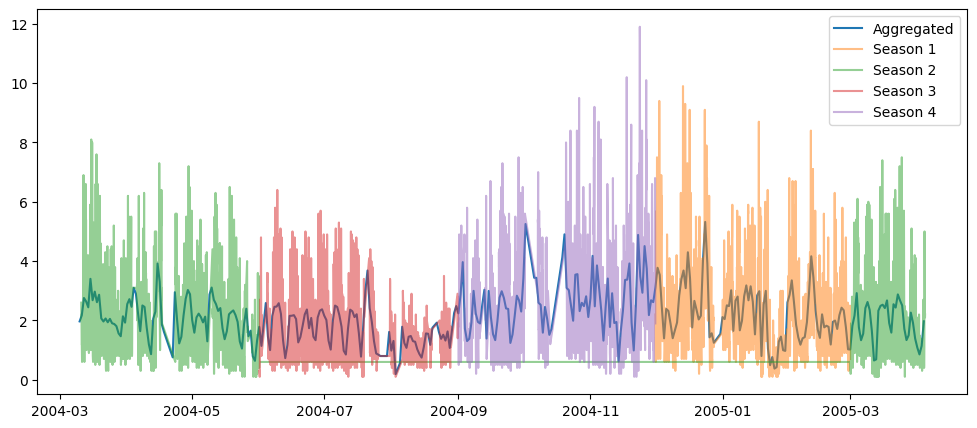

In [73]:
plt.figure(figsize=(12,5))
plt.plot(daily_co.index, daily_co.values, label='Aggregated')
for season, group in df_copy.groupby('season'):
    plt.plot(group.index, group['CO(GT)'], alpha=0.5, label=f'Season {season}')
plt.legend()
plt.show()

##### Correlation Analysis

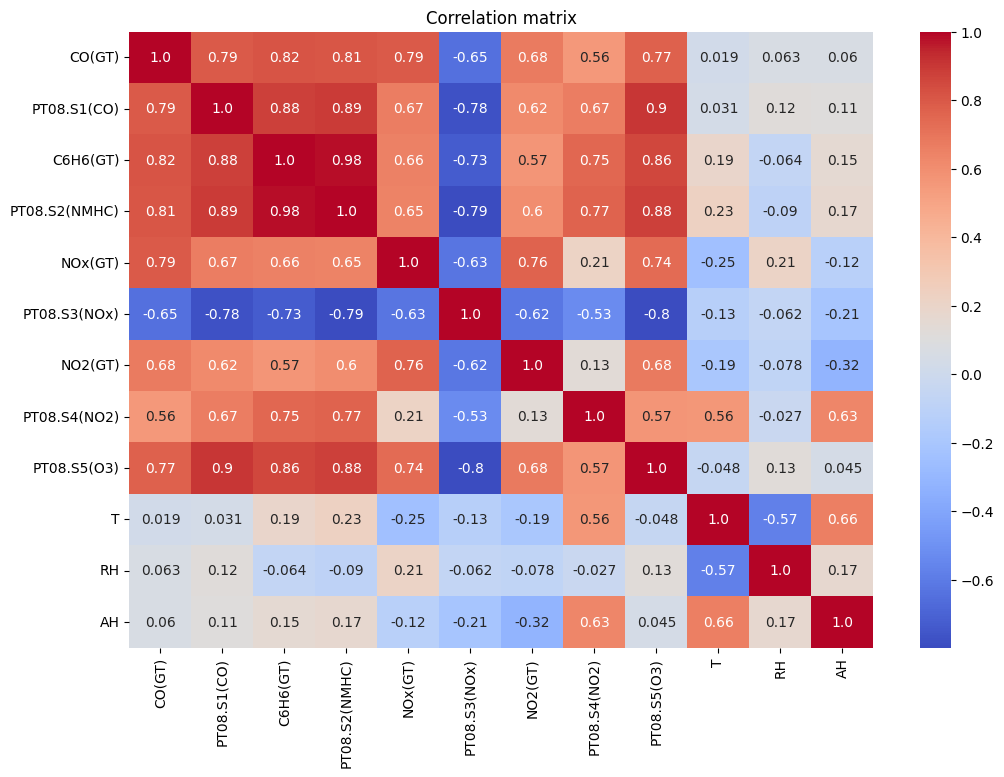

In [74]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='0.2', cmap='coolwarm', cbar=True)
plt.title("Correlation matrix")
plt.show()

In [75]:
df_model = df.copy()
cols = df.columns.to_list()

threshold = 0.8
corr_matrix = df_model[cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = []
for col in upper.columns:
    correlated_cols = upper.index[upper[col] > threshold].tolist()
    to_drop.extend(correlated_cols)

to_drop = list(set(to_drop))
print("Columns to drop:", to_drop)

df_model = df_model.drop(columns=to_drop)
print("Remaining columns:", df_model.columns.to_list())

Columns to drop: ['C6H6(GT)', 'CO(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)']
Remaining columns: ['NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


##### Distribution Analysis

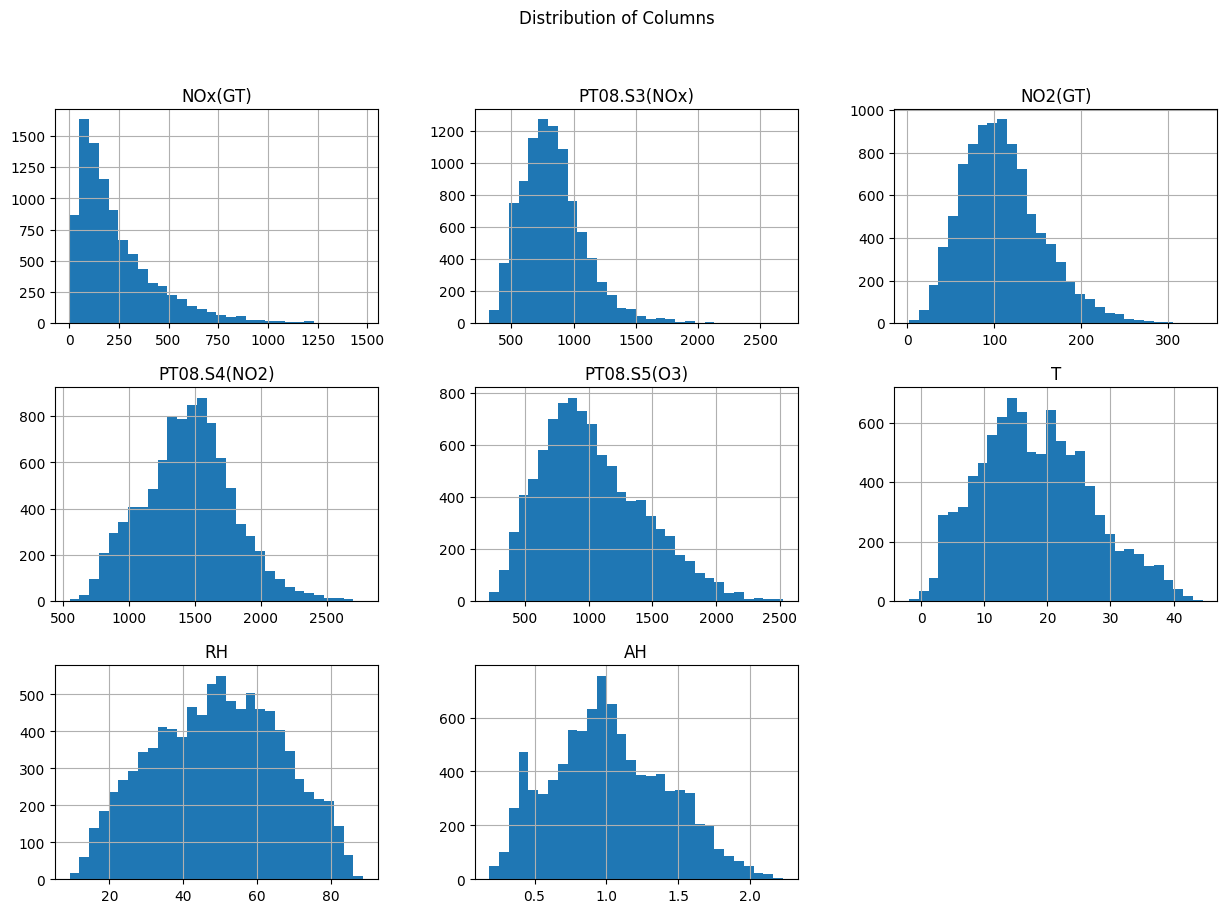

In [76]:
df_model.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Columns")
plt.show()


In [77]:
skew_values = df_model.skew()
print(skew_values)

NOx(GT)         1.697908
PT08.S3(NOx)    1.091029
NO2(GT)         0.707574
PT08.S4(NO2)    0.207815
PT08.S5(O3)     0.603006
T               0.325319
RH             -0.043924
AH              0.259390
dtype: float64


In [78]:
df_transformed = df_model.copy()

cols_to_fix = [col for col in df_model.columns if abs(df_model[col].skew()) > 1]

print("Колони за трансформација:", cols_to_fix)

for col in cols_to_fix:
    if (df_transformed[col] <= 0).any():
        df_transformed[col] = df_transformed[col] + abs(df_transformed[col].min()) + 1
    
    df_transformed[col], _ = boxcox(df_transformed[col])

print(df_transformed[cols_to_fix].skew())

Колони за трансформација: ['NOx(GT)', 'PT08.S3(NOx)']
NOx(GT)        -0.015108
PT08.S3(NOx)   -0.000152
dtype: float64


In [79]:
skew_values = df_transformed.skew()
print(skew_values)

NOx(GT)        -0.015108
PT08.S3(NOx)   -0.000152
NO2(GT)         0.707574
PT08.S4(NO2)    0.207815
PT08.S5(O3)     0.603006
T               0.325319
RH             -0.043924
AH              0.259390
dtype: float64


In [80]:
df_transformed

NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                             
2004-03-10 18:00:00  7.394882      6.264576    113.0        1692.0   
2004-03-10 19:00:00  6.466335      6.349869     92.0        1559.0   
2004-03-10 20:00:00  6.926623      6.326233    114.0        1555.0   
2004-03-10 21:00:00  7.466412      6.291598    122.0        1584.0   
2004-03-10 22:00:00  6.926623      6.370812    116.0        1490.0   
...                       ...           ...      ...           ...   
2005-04-04 10:00:00  9.652166      5.716500    190.0        1374.0   
2005-04-04 11:00:00  8.991981      5.810091    179.0        1264.0   
2005-04-04 12:00:00  8.582201      5.808731    175.0        1241.0   
2005-04-04 13:00:00  8.110278      5.933182    156.0        1041.0   
2005-04-04 14:00:00  8.365551      5.875272    168.0        1129.0   

                     PT08.S5(O3)     T    RH      AH  
Datetime                                              
2004-03-10 18:00:00       1268.0  13.6  48.9  0.7578  
2004-03-10 19:00:00        972.0  13.3  47.7  0.7255  
2004-03-10 20:00:00       1074.0  11.9  54.0  0.7502  
2004-03-10 21:00:00       1203.0  11.0  60.0  0.7867  
2004-03-10 22:00:00       1110.0  11.2  59.6  0.7888  
...                          ...   ...   ...     ...  
2005-04-04 10:00:00       1729.0  21.9  29.3  0.7568  
2005-04-04 11:00:00       1269.0  24.3  23.7  0.7119  
2005-04-04 12:00:00       1092.0  26.9  18.3  0.6406  
2005-04-04 13:00:00        770.0  28.3  13.5  0.5139  
2005-04-04 14:00:00        816.0  28.5  13.1  0.5028  

[9357 rows x 8 columns]

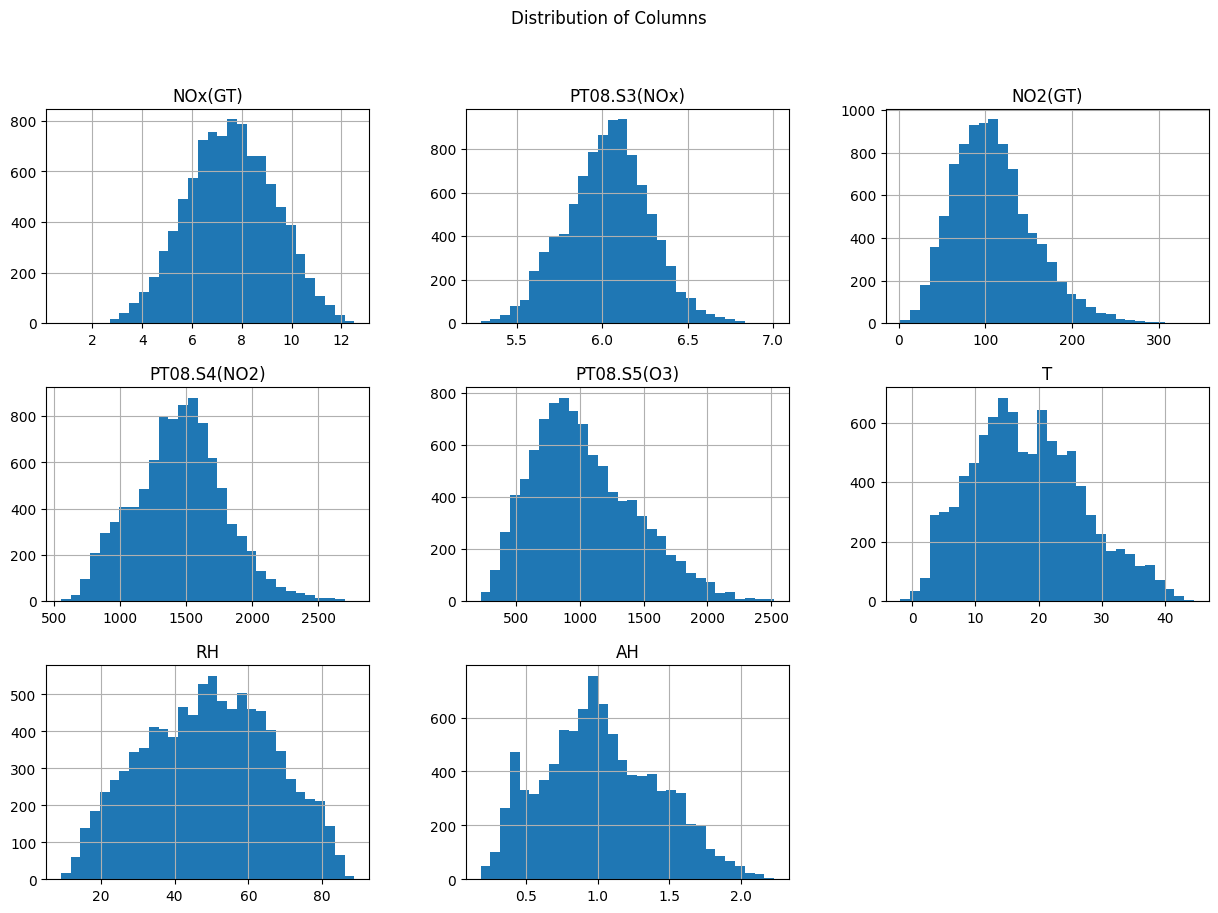

In [81]:
df_transformed.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Columns")
plt.show()

<Figure size 1200x400 with 0 Axes>

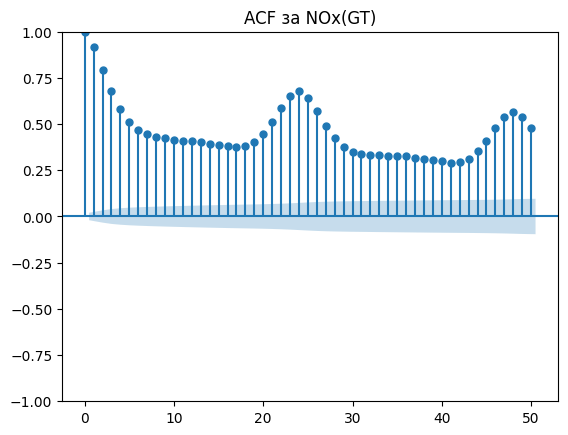

<Figure size 1200x400 with 0 Axes>

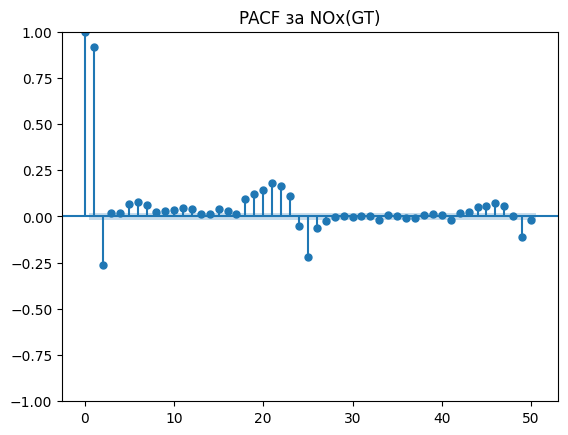

<Figure size 1200x400 with 0 Axes>

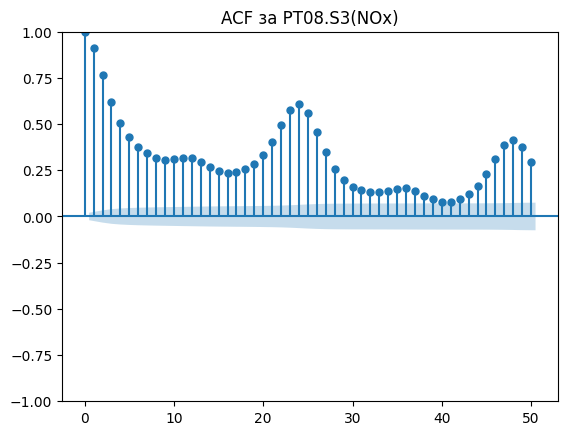

<Figure size 1200x400 with 0 Axes>

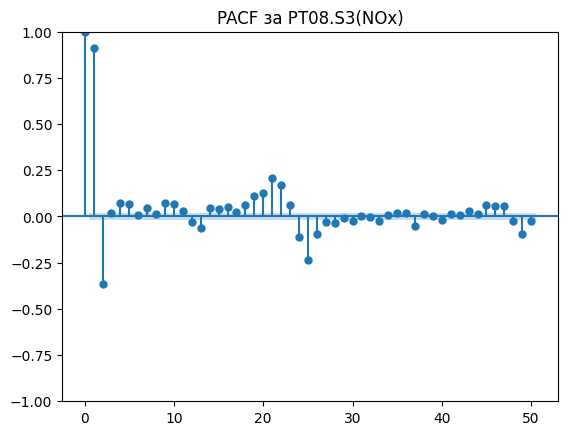

<Figure size 1200x400 with 0 Axes>

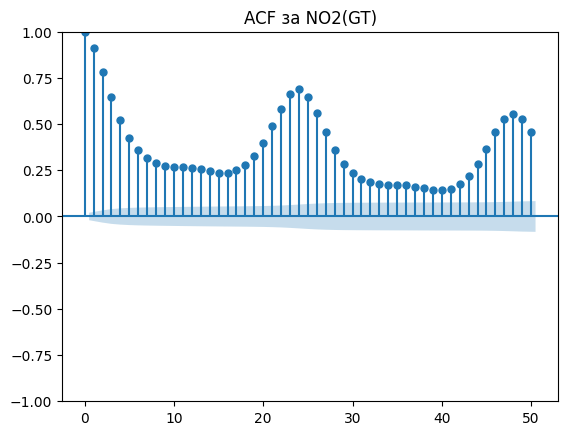

<Figure size 1200x400 with 0 Axes>

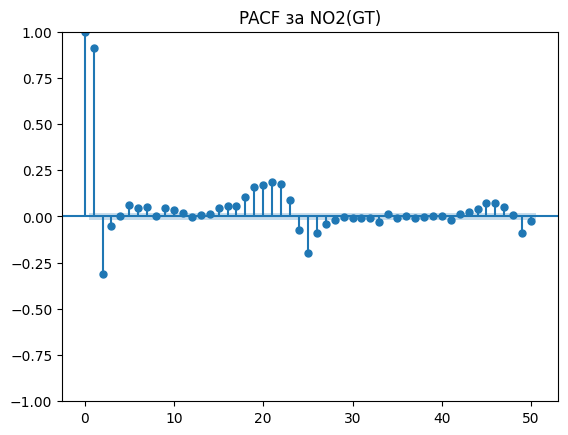

<Figure size 1200x400 with 0 Axes>

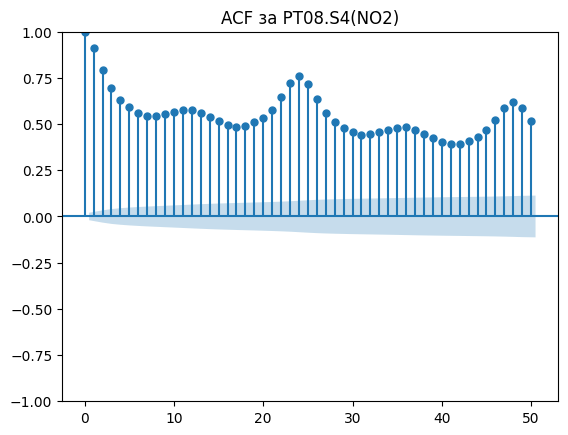

<Figure size 1200x400 with 0 Axes>

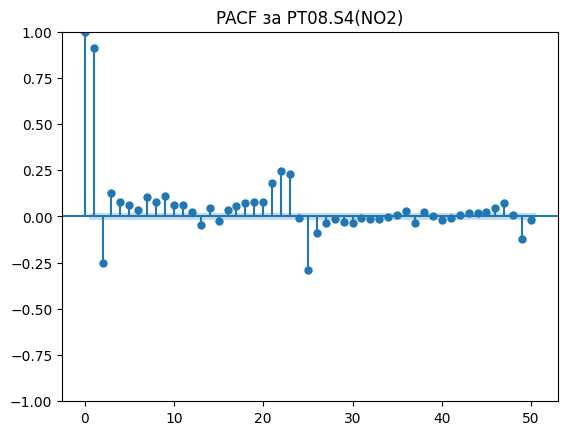

<Figure size 1200x400 with 0 Axes>

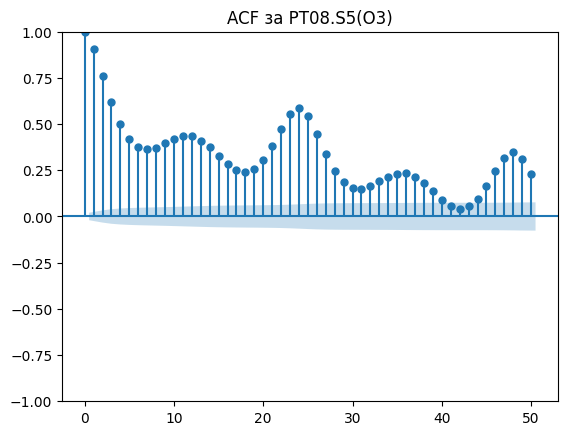

<Figure size 1200x400 with 0 Axes>

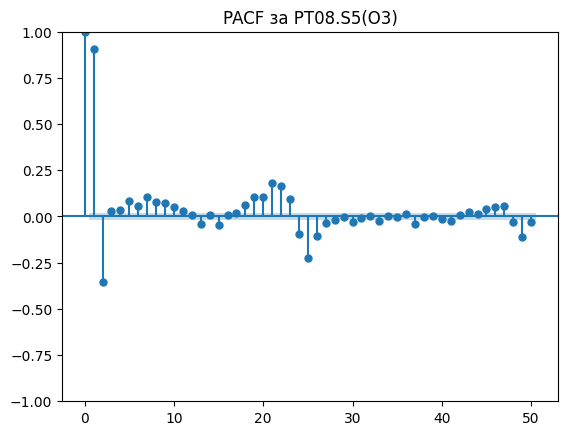

<Figure size 1200x400 with 0 Axes>

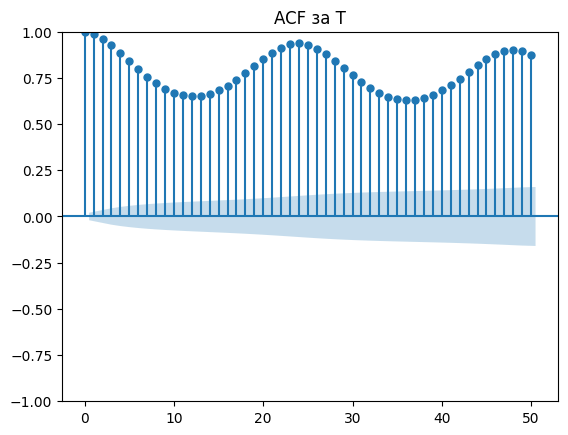

<Figure size 1200x400 with 0 Axes>

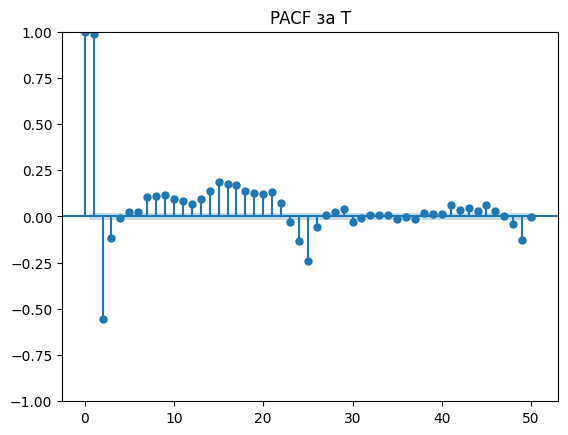

<Figure size 1200x400 with 0 Axes>

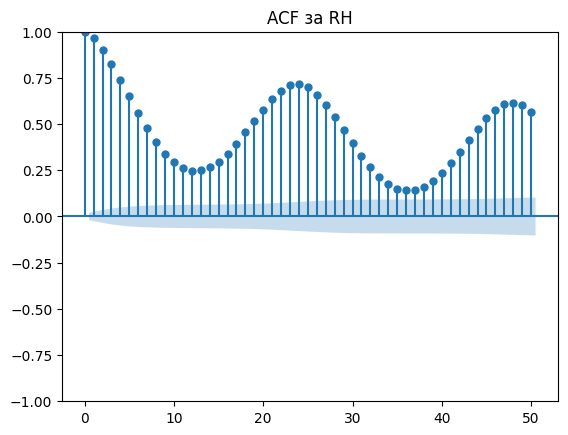

<Figure size 1200x400 with 0 Axes>

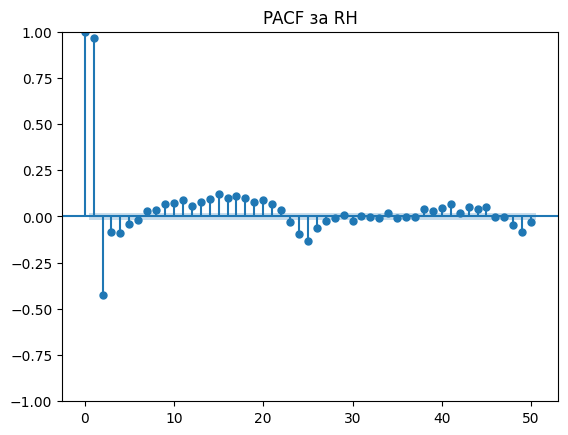

<Figure size 1200x400 with 0 Axes>

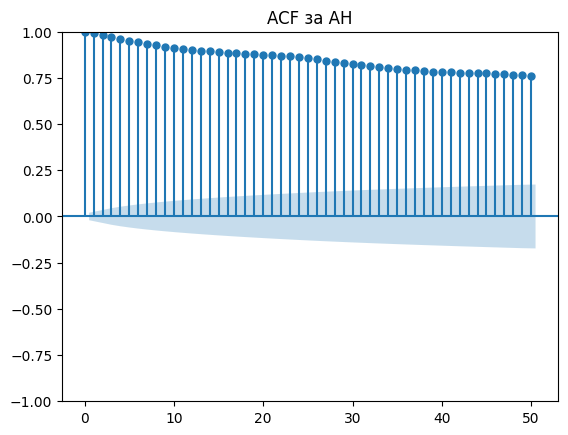

<Figure size 1200x400 with 0 Axes>

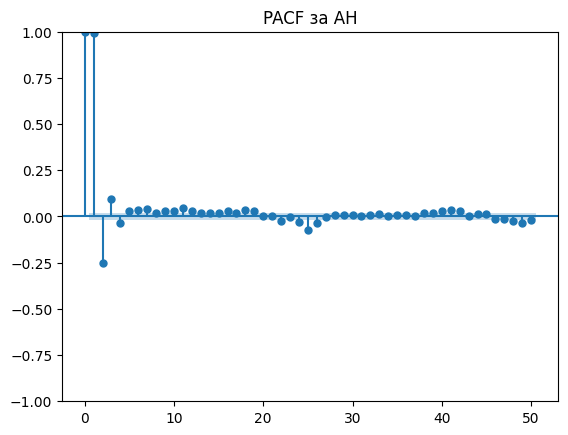

In [82]:
n_lags = 50

for col in df_model.columns:
    data = df_model[col].dropna()
    
    # --- ACF ---
    plt.figure(figsize=(12,4))
    plot_acf(data, lags=n_lags)
    plt.title(f"ACF за {col}")
    plt.show()
    
    # --- PACF ---
    plt.figure(figsize=(12,4))
    plot_pacf(data, lags=n_lags, method='ywm')
    plt.title(f"PACF за {col}")
    plt.show()

##### PCA

In [83]:
X_vif = df_transformed.copy()
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

        Feature        VIF
0       NOx(GT)  83.872801
1  PT08.S3(NOx)  74.411707
2       NO2(GT)  27.568659
3  PT08.S4(NO2)  85.182631
4   PT08.S5(O3)  39.777527
5             T  73.980501
6            RH  71.359852
7            AH  68.577657


In [84]:
cols_for_pca = [col for col in df_transformed.columns if col not in to_drop]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[cols_for_pca])

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape na PCA data:", X_pca.shape)
print("Variance explained:", pca.explained_variance_ratio_.cumsum())

Shape na PCA data: (9357, 5)
Variance explained: [0.4351408  0.736875   0.90137426 0.94479657 0.96853022]


In [85]:
datetimes = df_transformed.index

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=datetimes)

print(df_pca)

                          PC1       PC2       PC3       PC4       PC5
Datetime                                                             
2004-03-10 18:00:00 -0.010964 -0.409318  0.048978  1.134399  0.833332
2004-03-10 19:00:00 -1.119768 -0.473434  0.058705  1.037485  0.717972
2004-03-10 20:00:00 -0.591651 -0.755030 -0.177719  0.881355  0.955909
2004-03-10 21:00:00 -0.088301 -0.876133 -0.493947  0.832527  1.018797
2004-03-10 22:00:00 -0.649552 -0.924282 -0.467137  0.776146  1.063058
...                       ...       ...       ...       ...       ...
2005-04-04 10:00:00  2.651773 -0.496135  1.780904 -0.136524 -0.389453
2005-04-04 11:00:00  1.485162 -0.402537  2.177319 -0.546508 -0.301920
2005-04-04 12:00:00  1.070349 -0.235564  2.579728 -0.623024 -0.376675
2005-04-04 13:00:00 -0.093230 -0.443358  2.956288 -0.891453 -0.468742
2005-04-04 14:00:00  0.335619 -0.384910  3.030828 -0.849884 -0.381790

[9357 rows x 5 columns]


In [86]:
X_vif = df_pca.copy()
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

  Feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0


In [89]:
for i, col in enumerate(df_pca.columns):
    print(f"Компонента {col}:")
    print(pca.components_[i])

Компонента PC1:
[ 0.46868976 -0.4989795   0.43139672  0.29438307  0.50243748 -0.01021222
  0.06674983  0.03976932]
Компонента PC2:
[-0.20098214 -0.08653561 -0.22210271  0.47043883  0.01020592  0.58871565
 -0.18781476  0.5472758 ]
Компонента PC3:
[ 0.02837865  0.03191148  0.28889994 -0.11401885 -0.03156     0.30159361
 -0.81846349 -0.37399947]
Компонента PC4:
[-0.43929196  0.06923521 -0.26032185  0.50929003  0.44508204 -0.26639935
 -0.08714684 -0.44544814]
Компонента PC5:
[ 0.02396241  0.64862742  0.58433379  0.42745435 -0.15503055  0.01483295
  0.1719344   0.02700292]


In [92]:
for i, col in enumerate(df_pca.columns):
    print(f"Компонента {col}:")
    for feature, weight in zip(df_transformed.columns, pca.components_[i]):
        print(f"  {feature}: {weight:.4f}")
    print()

Компонента PC1:
  NOx(GT): 0.4687
  PT08.S3(NOx): -0.4990
  NO2(GT): 0.4314
  PT08.S4(NO2): 0.2944
  PT08.S5(O3): 0.5024
  T: -0.0102
  RH: 0.0667
  AH: 0.0398

Компонента PC2:
  NOx(GT): -0.2010
  PT08.S3(NOx): -0.0865
  NO2(GT): -0.2221
  PT08.S4(NO2): 0.4704
  PT08.S5(O3): 0.0102
  T: 0.5887
  RH: -0.1878
  AH: 0.5473

Компонента PC3:
  NOx(GT): 0.0284
  PT08.S3(NOx): 0.0319
  NO2(GT): 0.2889
  PT08.S4(NO2): -0.1140
  PT08.S5(O3): -0.0316
  T: 0.3016
  RH: -0.8185
  AH: -0.3740

Компонента PC4:
  NOx(GT): -0.4393
  PT08.S3(NOx): 0.0692
  NO2(GT): -0.2603
  PT08.S4(NO2): 0.5093
  PT08.S5(O3): 0.4451
  T: -0.2664
  RH: -0.0871
  AH: -0.4454

Компонента PC5:
  NOx(GT): 0.0240
  PT08.S3(NOx): 0.6486
  NO2(GT): 0.5843
  PT08.S4(NO2): 0.4275
  PT08.S5(O3): -0.1550
  T: 0.0148
  RH: 0.1719
  AH: 0.0270



### Models/Algorithms

##### LSTM

In [87]:
n_steps = 24
feature_cols = df_pca.columns.tolist()

data = df_pca.values

X, y = [], []
for i in range(n_steps, len(data)):
    X.append(data[i-n_steps:i])
    y.append(data[i, :])        

X, y = np.array(X), np.array(y)
print("X shape:", X.shape) 
print("y shape:", y.shape) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y.shape[1])) 
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


X shape: (9333, 24, 5)
y shape: (9333, 5)
Epoch 1/20
234/234 [==============================] - 3s 8ms/step - loss: 0.4392 - val_loss: 0.2257
Epoch 2/20
234/234 [==============================] - 2s 7ms/step - loss: 0.1616 - val_loss: 0.1854
Epoch 3/20
234/234 [==============================] - 2s 8ms/step - loss: 0.1440 - val_loss: 0.1753
Epoch 4/20
234/234 [==============================] - 2s 9ms/step - loss: 0.1352 - val_loss: 0.1543
Epoch 5/20
234/234 [==============================] - 2s 9ms/step - loss: 0.1300 - val_loss: 0.1639
Epoch 6/20
234/234 [==============================] - 2s 8ms/step - loss: 0.1249 - val_loss: 0.1605
Epoch 7/20
234/234 [==============================] - 2s 8ms/step - loss: 0.1229 - val_loss: 0.1481
Epoch 8/20
234/234 [==============================] - 2s 8ms/step - loss: 0.1199 - val_loss: 0.1469
Epoch 9/20
234/234 [==============================] - 2s 7ms/step - loss: 0.1175 - val_loss: 0.1438
Epoch 10/20
234/234 [==============================] - 2s 

In [88]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.1266
RMSE: 0.3558
MAE: 0.2280
R²: 0.8495


In [90]:
y_pred = model.predict(X_test)

mean_pred = y_pred.mean(axis=0)
feature_importance = pd.Series(mean_pred, index=df_pca.columns).sort_values(ascending=False)
print(feature_importance)


PC3    0.404887
PC1    0.291517
PC5   -0.157644
PC4   -0.186432
PC2   -1.814622
dtype: float32


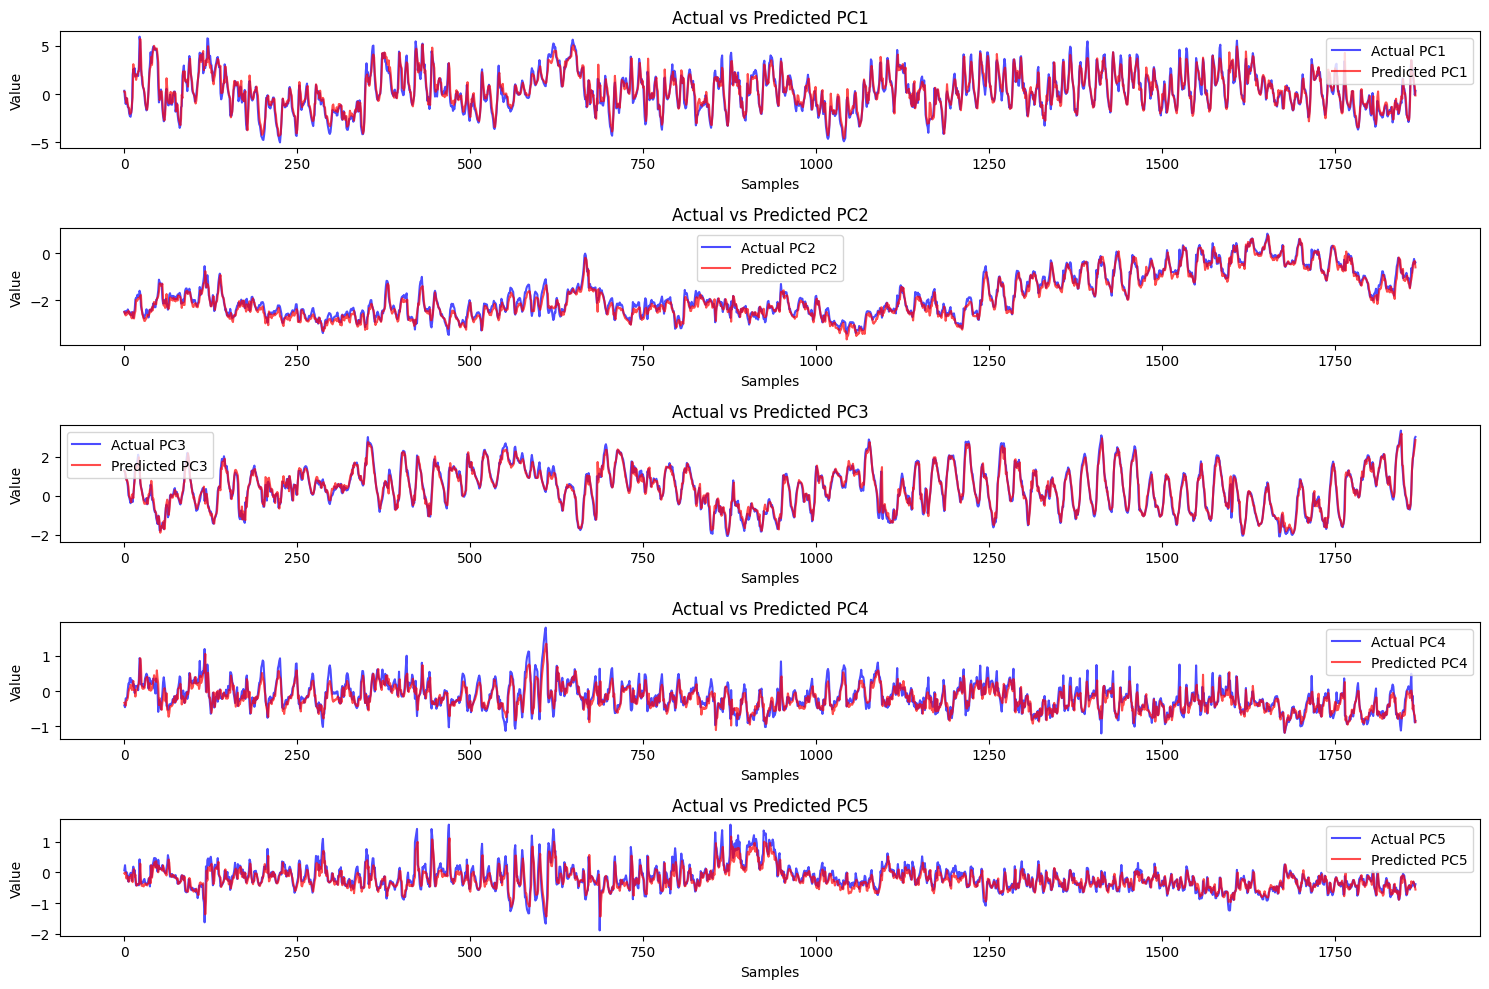

In [58]:
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.figure(figsize=(15, 10))

for i, pc in enumerate(pcs):
    plt.subplot(len(pcs), 1, i+1)
    plt.plot(y_test[:, i], label=f'Actual {pc}', color='blue', alpha=0.7)
    plt.plot(y_pred[:, i], label=f'Predicted {pc}', color='red', alpha=0.7)
    plt.title(f'Actual vs Predicted {pc}')
    plt.xlabel('Samples')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

#### Bidirectional LSTM Multivariate

In [ ]:
n_steps = 24
pcs = df_pca.columns.tolist()
df_lags = df_pca.copy()

for col in df_lags.columns:
    for lag in range(1, n_steps+1):
        df_lags[f"{col}_lag{lag}"] = df_lags[col].shift(lag)
df_lags = df_lags.dropna()

X = df_lags.drop(columns=pcs).values
y = df_lags[pcs].values

X = X.reshape((X.shape[0], n_steps, len(pcs)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # multivariate output
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
234/234 [==============================] - 5s 12ms/step - loss: 0.6330 - val_loss: 0.5071
Epoch 2/20
234/234 [==============================] - 2s 10ms/step - loss: 0.2958 - val_loss: 0.3533
Epoch 3/20
234/234 [==============================] - 2s 10ms/step - loss: 0.2434 - val_loss: 0.2952
Epoch 4/20
234/234 [==============================] - 3s 11ms/step - loss: 0.2199 - val_loss: 0.2897
Epoch 5/20
234/234 [==============================] - 3s 12ms/step - loss: 0.2066 - val_loss: 0.2646
Epoch 6/20
234/234 [==============================] - 3s 11ms/step - loss: 0.1945 - val_loss: 0.2596
Epoch 7/20
234/234 [==============================] - 3s 11ms/step - loss: 0.1852 - val_loss: 0.2337
Epoch 8/20
234/234 [==============================] - 3s 11ms/step - loss: 0.1766 - val_loss: 0.2341
Epoch 9/20
234/234 [==============================] - 3s 12ms/step - loss: 0.1723 - val_loss: 0.2255
Epoch 10/20
234/234 [==============================] - 2s 10ms/step - loss: 0.1664 - val_lo

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.2071
RMSE: 0.4551
MAE: 0.3316
R²: 0.6823


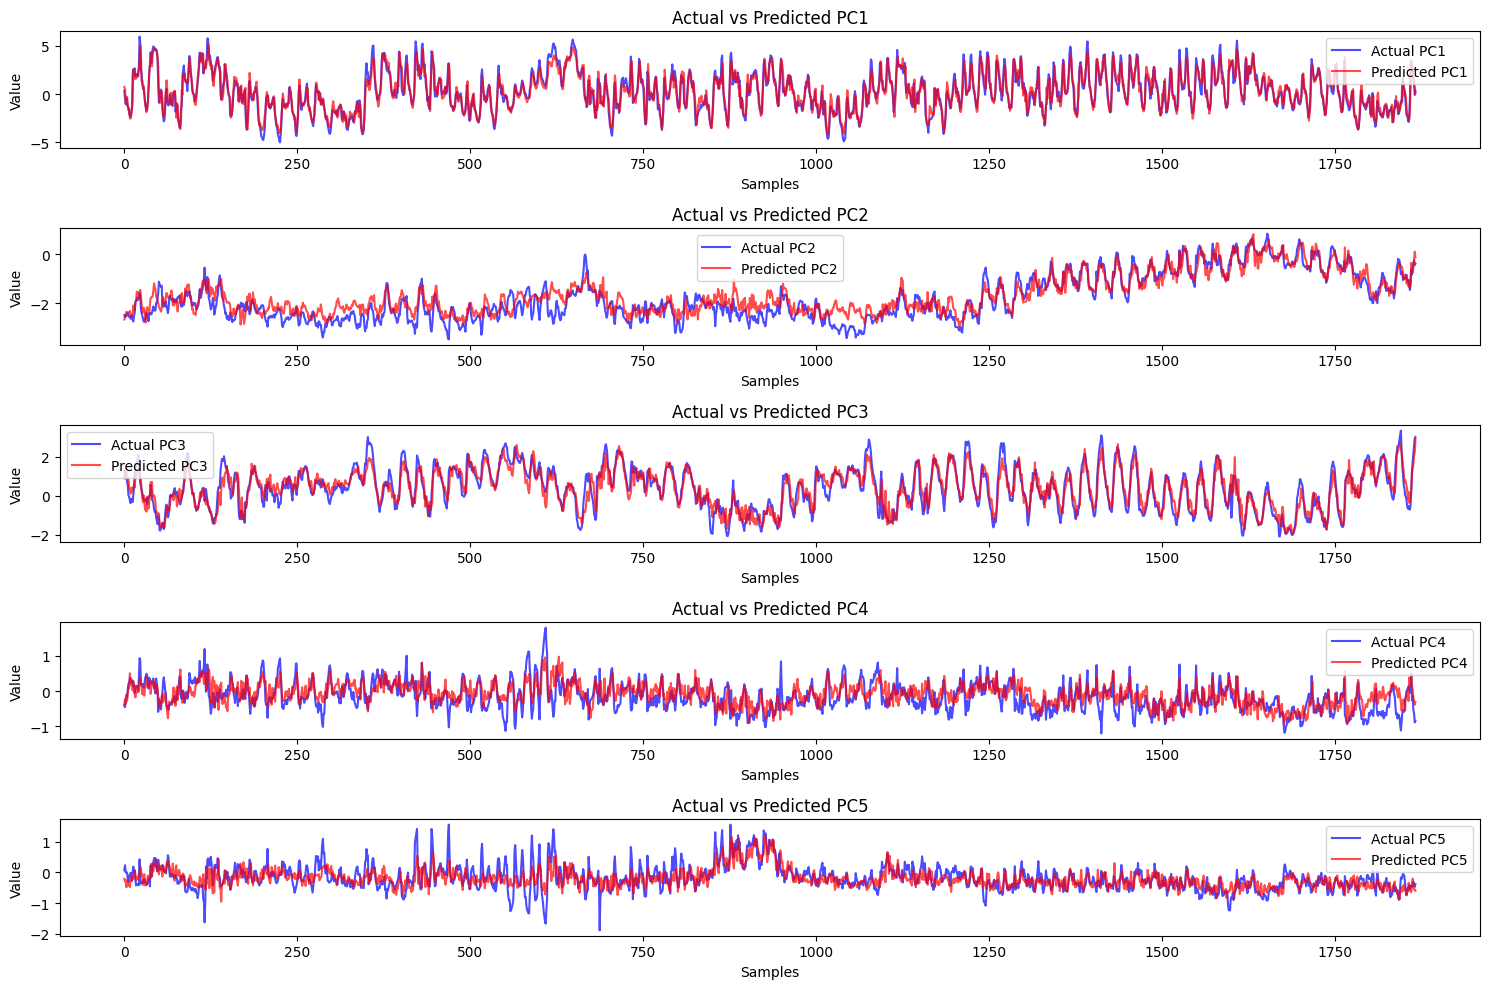

In [61]:
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.figure(figsize=(15, 10))

for i, pc in enumerate(pcs):
    plt.subplot(len(pcs), 1, i+1)
    plt.plot(y_test[:, i], label=f'Actual {pc}', color='blue', alpha=0.7)
    plt.plot(y_pred[:, i], label=f'Predicted {pc}', color='red', alpha=0.7)
    plt.title(f'Actual vs Predicted {pc}')
    plt.xlabel('Samples')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

#### GRU (RNN) Multivariate

In [ ]:
n_steps = 24
pcs = df_pca.columns.tolist()
df_lags = df_pca.copy()

for col in df_lags.columns:
    for lag in range(1, n_steps+1):
        df_lags[f"{col}_lag{lag}"] = df_lags[col].shift(lag)
df_lags = df_lags.dropna()

X = df_lags.drop(columns=pcs).values.reshape(len(df_lags), n_steps, len(pcs))
y = df_lags[pcs].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(GRU(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1])) 
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
234/234 [==============================] - 4s 9ms/step - loss: 1.0073 - val_loss: 0.9249
Epoch 2/20
234/234 [==============================] - 2s 9ms/step - loss: 0.5570 - val_loss: 0.6736
Epoch 3/20
234/234 [==============================] - 2s 10ms/step - loss: 0.4389 - val_loss: 0.6540
Epoch 4/20
234/234 [==============================] - 3s 11ms/step - loss: 0.3889 - val_loss: 0.5490
Epoch 5/20
234/234 [==============================] - 2s 10ms/step - loss: 0.3521 - val_loss: 0.5019
Epoch 6/20
234/234 [==============================] - 2s 8ms/step - loss: 0.3268 - val_loss: 0.4384
Epoch 7/20
234/234 [==============================] - 2s 9ms/step - loss: 0.2930 - val_loss: 0.4104
Epoch 8/20
234/234 [==============================] - 2s 10ms/step - loss: 0.2783 - val_loss: 0.4326
Epoch 9/20
234/234 [==============================] - 2s 10ms/step - loss: 0.2615 - val_loss: 0.3877
Epoch 10/20
234/234 [==============================] - 2s 9ms/step - loss: 0.2508 - val_loss: 0

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.2872
RMSE: 0.5359
MAE: 0.3912
R²: 0.6124


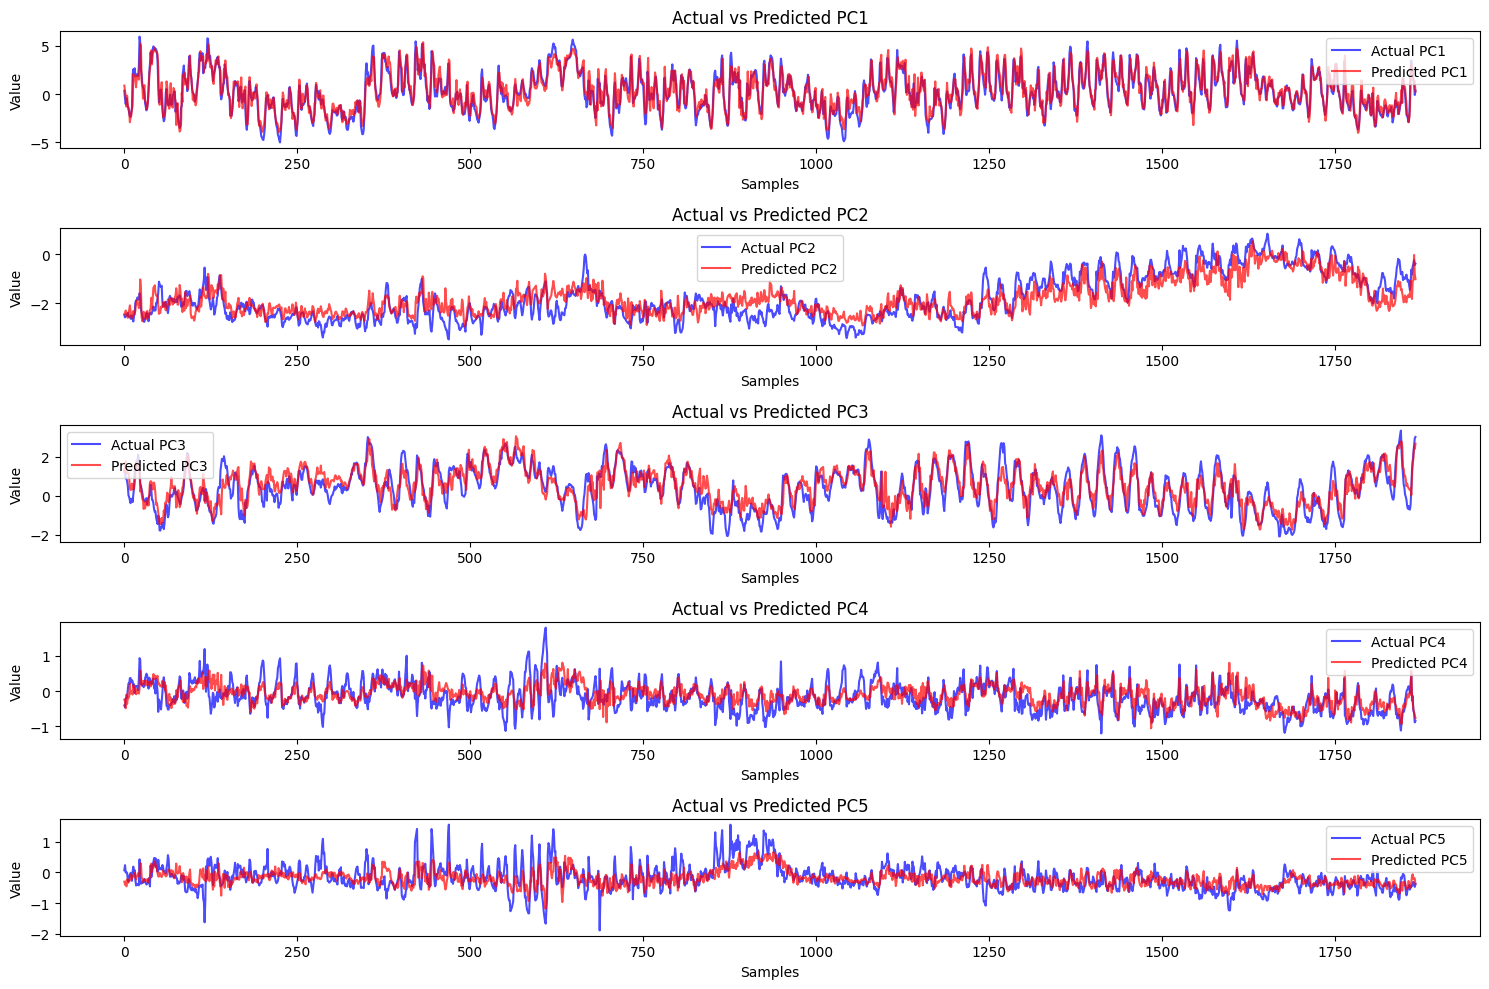

In [64]:
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.figure(figsize=(15, 10))

for i, pc in enumerate(pcs):
    plt.subplot(len(pcs), 1, i+1)
    plt.plot(y_test[:, i], label=f'Actual {pc}', color='blue', alpha=0.7)
    plt.plot(y_pred[:, i], label=f'Predicted {pc}', color='red', alpha=0.7)
    plt.title(f'Actual vs Predicted {pc}')
    plt.xlabel('Samples')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

##### XGBoost

In [ ]:
n_steps = 24
pcs = df_pca.columns.tolist()

df_lags = df_pca.copy()
for col in df_lags.columns:
    for lag in range(1, n_steps+1):
        df_lags[f"{col}_lag{lag}"] = df_lags[col].shift(lag)

df_lags = df_lags.dropna()

X = df_lags.drop(columns=pcs).values
y = df_lags[pcs].values              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)

multi_xgb = MultiOutputRegressor(xgb_model)
multi_xgb.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
         

In [ ]:
y_pred = multi_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.1512
RMSE: 0.3888
MAE: 0.2472
R²: 0.8307


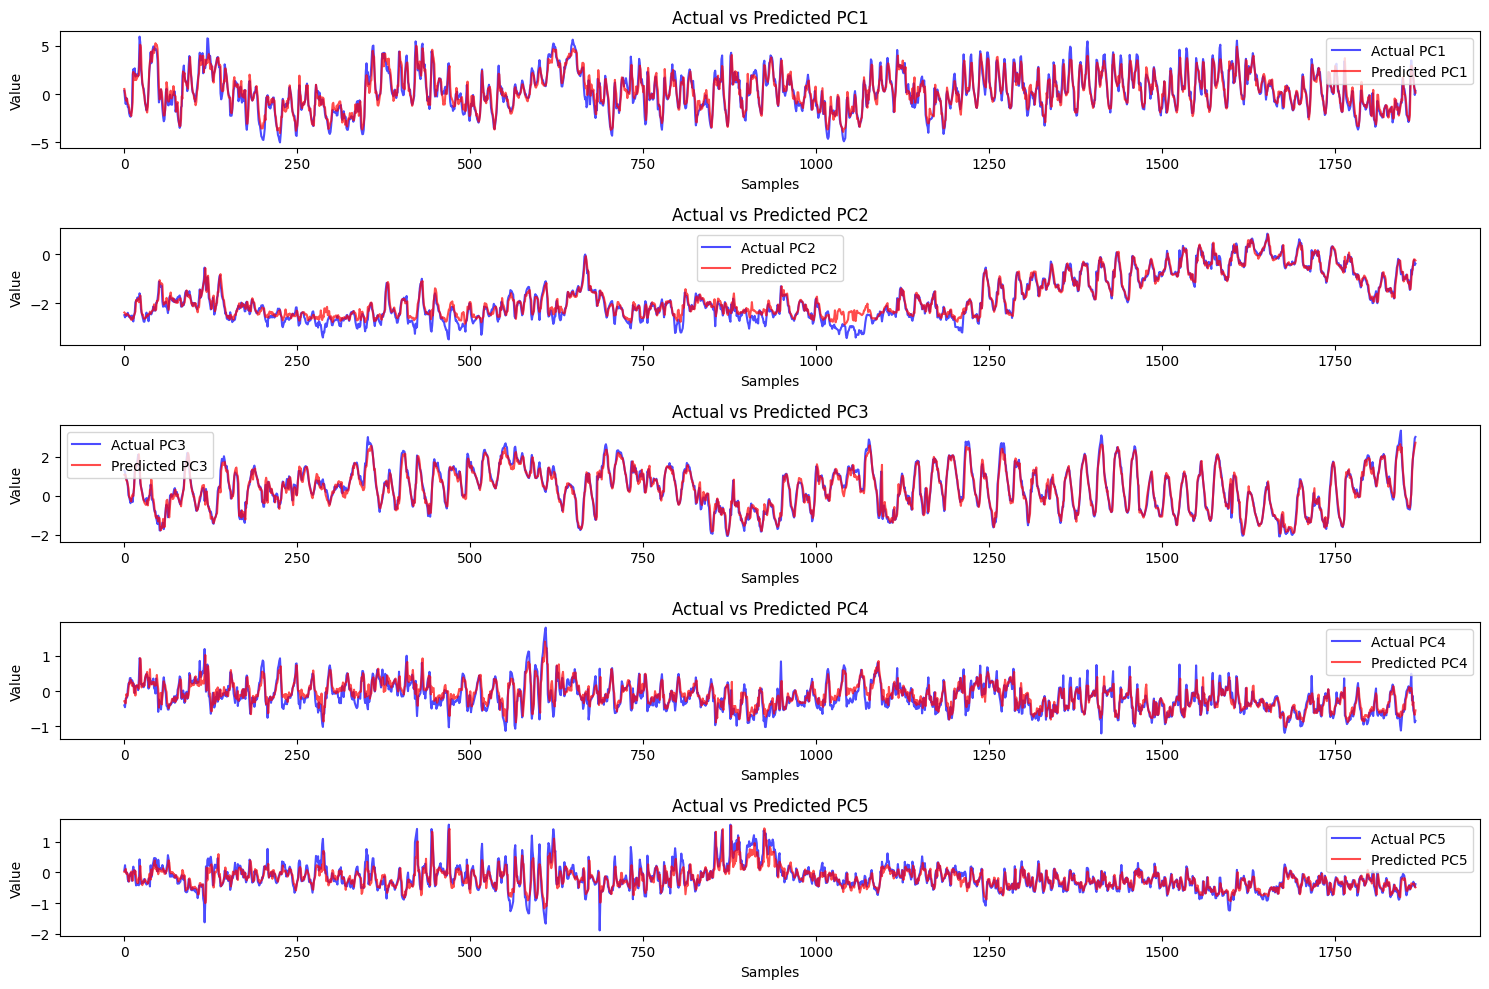

In [67]:
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.figure(figsize=(15, 10))

for i, pc in enumerate(pcs):
    plt.subplot(len(pcs), 1, i+1)
    plt.plot(y_test[:, i], label=f'Actual {pc}', color='blue', alpha=0.7)
    plt.plot(y_pred[:, i], label=f'Predicted {pc}', color='red', alpha=0.7)
    plt.title(f'Actual vs Predicted {pc}')
    plt.xlabel('Samples')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

#### Dynamic Time Warping (DTW)

In [27]:
X = df_pca.values.T
X_scaled = TimeSeriesScalerMeanVariance().fit_transform(X[:, :, np.newaxis])

distance_matrix = cdist_dtw(X_scaled)

linked = linkage(distance_matrix, method='average')
n_clusters = 2
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

print("Cluster assignment за секоја серија:")
for i, series_name in enumerate(df_pca.columns):
    print(f"{series_name} -> Cluster {cluster_labels[i]}")

Cluster assignment за секоја серија:
PC1 -> Cluster 1
PC2 -> Cluster 2
PC3 -> Cluster 1
PC4 -> Cluster 1
PC5 -> Cluster 1


c:\Users\linap\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [28]:
distance_matrix = cdist_dtw(X_scaled)  

In [30]:
sil_score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
print("Silhouette score (DTW):", sil_score)

Silhouette score (DTW): 0.11375124683623014


In [31]:
X_flat = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1]) 
db_index = davies_bouldin_score(X_flat, cluster_labels)
print("Davies-Bouldin index:", db_index)

Davies-Bouldin index: 0.7745966692414833


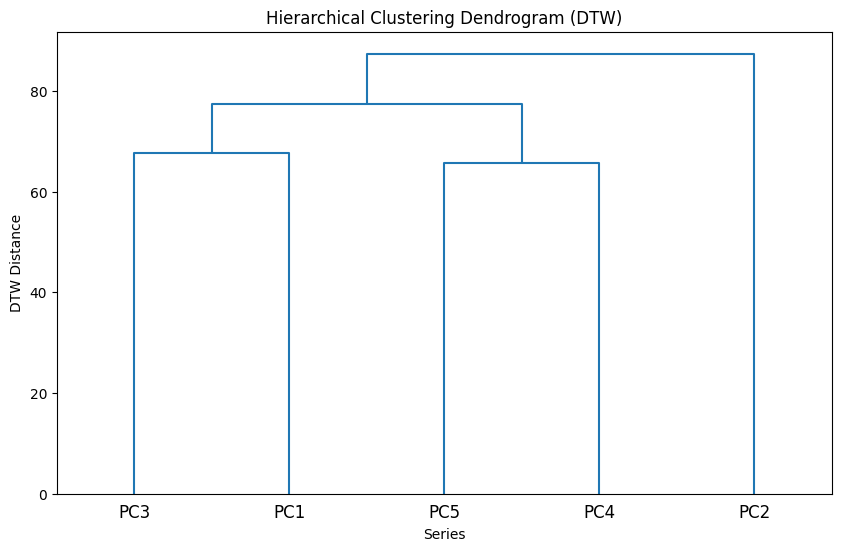

In [34]:
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    labels=df_pca.columns,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=None
)
plt.title("Hierarchical Clustering Dendrogram (DTW)")
plt.ylabel("DTW Distance")
plt.xlabel("Series")
plt.show()

#### Time Series Spectral Clustering

In [37]:
X_spectral = np.abs(fft(X_scaled.squeeze(), axis=1))

n_clusters = 2
sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
labels = sc.fit_predict(X_spectral)

print("Cluster assignment за секоја серија:")
for i, series_name in enumerate(df_pca.columns):
    print(f"{series_name} -> Cluster {labels[i]+1}")

Cluster assignment за секоја серија:
PC1 -> Cluster 1
PC2 -> Cluster 2
PC3 -> Cluster 1
PC4 -> Cluster 2
PC5 -> Cluster 2


c:\Users\linap\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [40]:
sil_score = silhouette_score(X_spectral, labels, metric='euclidean')
print("Silhouette score:", sil_score)

db_index = davies_bouldin_score(X_spectral, labels)
print("Davies-Bouldin index:", db_index)

Silhouette score: 0.10338854245605064
Davies-Bouldin index: 1.30707688637695


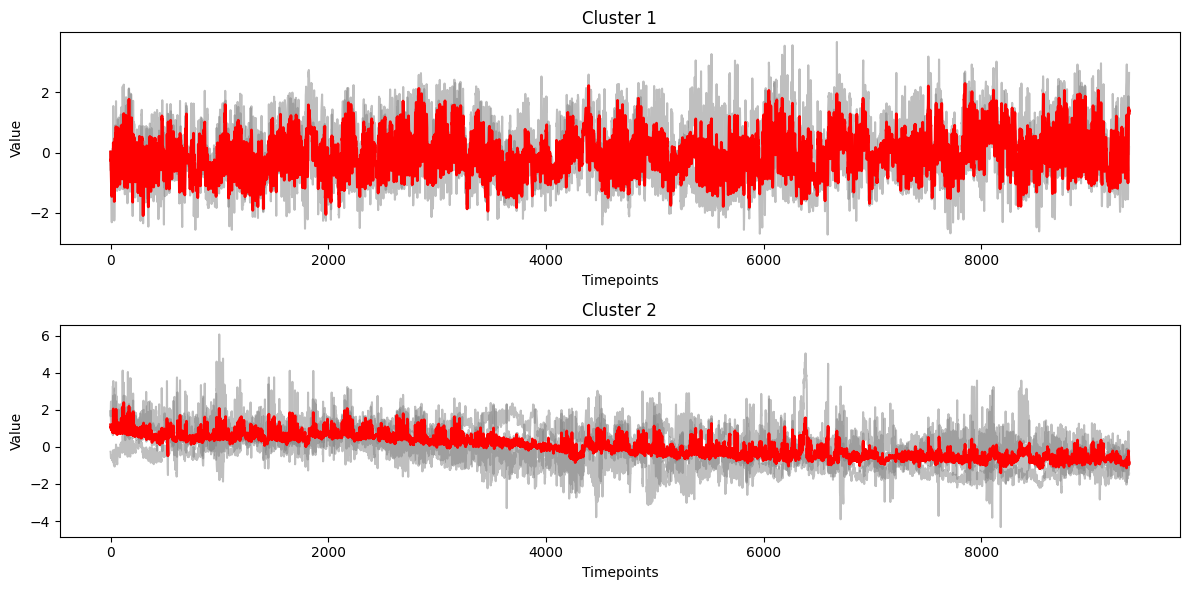

In [38]:
n_clusters = len(np.unique(labels))

plt.figure(figsize=(12, 6))

for cluster in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster+1)
    cluster_series = X_scaled[labels == cluster]
    
    for series in cluster_series:
        plt.plot(series.ravel(), color='gray', alpha=0.5)
    
    centroid = cluster_series.mean(axis=0)
    plt.plot(centroid.ravel(), color='red', linewidth=2)
    
    plt.title(f'Cluster {cluster+1}')
    plt.xlabel('Timepoints')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

### Conclusion

Кластеризацијата открива три различни типови на серии: стабилни, средно флуктуирачки и високо варијабилни. Меѓутоа, низок Silhouette score укажува дека границите меѓу кластерите се нејасни, и некои серии би можеле да се сместат во повеќе од еден кластер. Овие резултати се корисни за општа сегментација на серии и анализа на динамиката, но за прецизни предиктивни модели или детекција на аномалии може да се разгледаат дополнителни методи за подобрување на кластеризацијата, како зголемување на бројот на кластери или користење на друга метрика.

### References

- Vito S. Air Quality [dataset]. 2008. UCI Machine Learning Repository. Available from: https://archive.ics.uci.edu/dataset/360/air+quality
- Paneva, Lina. “Air Quality Time Series Analysis and Forecasting.” Own analysis, 2025.